

This dataset shows what happened to **SOL (Solana)** — a cryptocurrency — **over time**, one row per hour.
Each row captures:

* Price (how much 1 SOL costs in USDT)
* Volume (how many SOL were traded)
* Market behavior (who is buying/selling, how intense trading is)
* Technical indicators (mathematical tools traders use to spot patterns)
* Targets (future price direction — used to train ML models)

---

##  Basic Price Columns — “The Candle”

Every hour, crypto charts show a *candlestick*. It summarizes price movement in that hour.

| Column          | Meaning                                               | Simple Analogy                        |
| --------------- | ----------------------------------------------------- | ------------------------------------- |
| **`timestamp`** | The exact time of the data (e.g., `2025-10-10 13:00`) | The clock on your market chart        |
| **`open`**      | Price at the start of that hour                       | What price the hour started at        |
| **`high`**      | Highest price reached during the hour                 | The peak — how high the price climbed |
| **`low`**       | Lowest price reached during the hour                  | The dip — how low the price fell      |
| **`close`**     | Price at the end of the hour                          | Final price when the hour ended       |

> Traders call this OHLC (Open, High, Low, Close).
> Example: If SOL opened at $150, went as high as $155, as low as $148, and closed at $153 — that’s one candle.

---

##   Volume & Trade Activity — “How Busy Was the Market?”

Volume tells you *how much trading happened*.
It’s a clue to **interest** and **liquidity**.

| Column                | Meaning                                    | Example                                                |
| --------------------- | ------------------------------------------ | ------------------------------------------------------ |
| **`volume`**          | Amount of SOL traded that hour             | If 100,000 SOL were traded → `volume = 100000`         |
| **`quote_volume`**    | Same as volume, but measured in USDT       | 100,000 SOL × $150 = 15,000,000 USDT                   |
| **`trade_count`**     | How many trades happened                   | More trades = more active hour                         |
| **`taker_buy_base`**  | How much SOL was bought by “market buyers” | “Taker” = someone aggressively buying at current price |
| **`taker_buy_quote`** | USDT value of those market buys            | Measures buying pressure in dollars                    |

💡 **If taker buys > 50% of total volume → more buyers than sellers → bullish (price may go up).**

---

##  Futures & Derivatives Metrics — “The Leverage Side”

Crypto also has **futures** (betting on future prices). These columns show what’s happening in that leveraged market.

| Column                        | Meaning                                                                    | Intuition                                                     |
| ----------------------------- | -------------------------------------------------------------------------- | ------------------------------------------------------------- |
| **`funding_rate`**            | Small fee paid between long (buy) and short (sell) traders every few hours | Positive funding = more people going long (bullish sentiment) |
| **`open_interest`**           | Number of open futures contracts                                           | Shows how much money is “in the game”                         |
| **`sum_open_interest_value`** | Total $ value of those contracts                                           | = open_interest × price                                       |
| **`long_liquidations`**       | Value of long (buy) positions that got forcefully closed                   | When price crashes, overleveraged buyers get liquidated       |
| **`short_liquidations`**      | Value of short (sell) positions liquidated                                 | When price spikes up, short sellers get wiped out             |
| **`total_liquidations`**      | Sum of both types                                                          | Shows market stress or panic                                  |

💡 When liquidations spike, it usually means **a big move** just happened — a crash or a short squeeze.

---

##   Returns & Moving Averages — “Trend and Change”

These tell you **how price changes over time** and **smooth out noise**.

| Column                          | Meaning                              | Explanation                                          |
| ------------------------------- | ------------------------------------ | ---------------------------------------------------- |
| **`returns`**                   | % change from last close             | (Closeₜ - Closeₜ₋₁) / Closeₜ₋₁                       |
| **`log_returns`**               | Similar but smoother for math models | Handles compounding effects better                   |
| **`sma_7`, `sma_25`, `sma_99`** | Simple Moving Averages               | Average of last 7, 25, or 99 hours — tells the trend |
| **`ema_12`, `ema_26`**          | Exponential Moving Averages          | Like SMA but gives more weight to recent data        |

💡 **If short EMA > long EMA → uptrend.**
That’s how traders detect bullish or bearish signals.

---

##   Bollinger Bands — “How Wild the Price Is”

They show how much price *bounces around*.

| Column            | Meaning                                    | Use                      |
| ----------------- | ------------------------------------------ | ------------------------ |
| **`bb_upper`**    | Upper limit = average + 2×volatility       | Top of “normal” range    |
| **`bb_lower`**    | Lower limit = average − 2×volatility       | Bottom of “normal” range |
| **`bb_width`**    | Gap between upper and lower bands          | Wider = more volatile    |
| **`bb_position`** | Position of current price inside the bands | Near 1 = top, 0 = bottom |

 If price hits the upper band → it’s “overbought.”
If it hits the lower band → “oversold.”

---

##   Momentum Indicators — “How Strong the Move Is”

These measure **speed and strength** of price movement.

| Column                                      | Meaning                               | Intuition                                                                |
| ------------------------------------------- | ------------------------------------- | ------------------------------------------------------------------------ |
| **`rsi`**                                   | Relative Strength Index               | Ranges 0–100; >70 = overbought, <30 = oversold                           |
| **`macd`, `macd_signal`, `macd_histogram`** | Moving Average Convergence Divergence | Measures trend direction and strength                                    |
| **`volatility`**                            | How much returns fluctuate            | Bigger = more unpredictable                                              |
| **`atr`**                                   | Average True Range                    | Measures how much price moves per candle                                 |
| **`volume_sma`, `volume_ratio`**            | Average and ratio of volume           | Detects unusual spikes in activity                                       |
| **`price_volume`**                          | close × volume                        | Total value traded                                                       |
| **`vwap`**                                  | Volume Weighted Average Price         | The “average price big traders got in”                                   |
| **`obv`**                                   | On-Balance Volume                     | Adds volume when price up, subtracts when down — detects buying pressure |

---

##   Oscillators & Divergence Indicators — “Tired or Energized?”

They tell whether the market is **overheated or exhausted**.

| Column                   | Meaning                 | Intuition                                           |
| ------------------------ | ----------------------- | --------------------------------------------------- |
| **`stoch_k`, `stoch_d`** | Stochastic Oscillator   | Measures how price compares to its range (momentum) |
| **`williams_r`**         | Williams %R             | Similar to Stochastic; low = oversold               |
| **`cci`**                | Commodity Channel Index | High = strong uptrend, low = strong downtrend       |

  These are often used to find *reversal points* (where trend might flip).

---

##  Time Features — “Calendar Context”

Even though crypto runs 24/7, activity changes by time of day and day of week.

| Column                                 | Meaning                | Example                                      |
| -------------------------------------- | ---------------------- | -------------------------------------------- |
| **`hour`**                             | Hour of the day (0–23) | Midnight vs afternoon trading volume differs |
| **`day_of_week`**                      | 0 = Monday, 6 = Sunday | Weekends often have lower volume             |
| **`day_of_month`, `month`, `quarter`** | Calendar info          | Captures patterns like month-end volatility  |
| **`is_weekend`**                       | 1 if Sat/Sun           | Useful for models to reduce false signals    |

---

##   Momentum (Price & Volume Changes) — “Recent Speed”

Tracks how fast things changed over different time windows.

| Column                                     | Meaning                                      | Why It’s Useful                          |
| ------------------------------------------ | -------------------------------------------- | ---------------------------------------- |
| **`price_momentum_1h`, `4h`, `24h`, `7d`** | % change over 1 hour, 4 hours, 1 day, 7 days | Detects short and long-term trends       |
| **`volume_momentum_1h`, `24h`**            | % change in volume                           | Spikes often come before big price moves |

  Price up + Volume up = strong trend.
Price up + Volume down = weak trend.

---

##  Liquidation Metrics — “Leverage Stress”

Shows how traders with borrowed money are being affected.

| Column                      | Meaning                                 | Why It Matters                                   |
| --------------------------- | --------------------------------------- | ------------------------------------------------ |
| **`liquidation_ratio`**     | long_liquidations / short_liquidations  | If >1 → longs being liquidated (bearish)         |
| **`liquidation_imbalance`** | Difference standardized                 | Shows market bias (too many longs or shorts)     |
| **`liquidation_intensity`** | Total liquidations / total traded value | Tells if market is being driven by forced trades |

---

##   Funding Rate Behavior — “Perp Market Sentiment Over Time”

These are rolling statistics of funding rates.

| Column                    | Meaning                               | Example                                  |
| ------------------------- | ------------------------------------- | ---------------------------------------- |
| **`funding_rate_ma`**     | Average funding over past 24 hours    | Smooths noise                            |
| **`funding_rate_std`**    | How much funding fluctuates           | Stable vs volatile sentiment             |
| **`funding_rate_zscore`** | How extreme current rate is vs normal | Detects unusual bullish/bearish pressure |

---

##   Open Interest Dynamics — “Participation Trends”

| Column                    | Meaning                   | What It Tells                                               |
| ------------------------- | ------------------------- | ----------------------------------------------------------- |
| **`oi_change`**           | % change in open interest | New contracts = more participation                          |
| **`oi_price_divergence`** | OI change × price change  | Detects if traders are adding positions *against* the trend |

💡 Example: Price falling but OI rising → people betting on more downside (bearish).

---

##   Candle Shape Metrics — “Reading the Candle’s Story”

Candlestick anatomy gives clues about psychology.

| Column               | Meaning                      | Interpretation                                               |
| -------------------- | ---------------------------- | ------------------------------------------------------------ |
| **`high_low_ratio`** | high ÷ low                   | How big the move was                                         |
| **`close_position`** | (close − low) / (high − low) | Where price closed within range (near top or bottom)         |
| **`upper_shadow`**   | % of upper wick              | Long upper wick → sellers pushed price down                  |
| **`lower_shadow`**   | % of lower wick              | Long lower wick → buyers pushed price up                     |
| **`trend_strength`** | (close − sma_25) / stddev    | How far current price is from 25-hour average (standardized) |

---

##   Target Variables — “The Goals for ML Models”

These depend on **future** data — what happens next.

| Column                                                  | Meaning                               | Use                            |
| ------------------------------------------------------- | ------------------------------------- | ------------------------------ |
| **`price_change_1h_future`, `4h_future`, `24h_future`** | % price change in next 1h, 4h, or 24h | Used for regression models     |
| **`price_up_1h`, `price_up_4h`, `price_up_24h`**        | 1 if future price went up, else 0     | Used for classification models |
| **`high_volatility_next_4h`**                           | 1 if next 4 hours are volatile        | Used for risk prediction       |

 These are what you try to **predict** using all other columns as input.

---

##   Summary — Feature Groups

| Type                      | Columns      | What They Do                        |
| ------------------------- | ------------ | ----------------------------------- |
| **Price & Volume**        | 1–10         | Basic market info                   |
| **Futures Metrics**       | 11–16        | Leverage and trader behavior        |
| **Returns & Trend**       | 17–23        | Directional movement                |
| **Volatility Indicators** | 24–27, 32–33 | Risk and fluctuation                |
| **Momentum Indicators**   | 28–31, 39–42 | Strength of movement                |
| **Volume Analysis**       | 34–38, 53–54 | Demand/supply activity              |
| **Time Features**         | 43–48        | Seasonality                         |
| **Derived Features**      | 55–67        | Market structure and candle details |
| **Targets**               | 68–74        | Prediction goals                    |

---

##   Summary Analogy

Think of the dataset like a **crypto market diary**:

| Analogy            | Data                             |
| ------------------ | -------------------------------- |
| Clock time         | `timestamp`                      |
| Price journal      | OHLC                             |
| Trading activity   | volume, trades                   |
| Trader emotions    | RSI, MACD, liquidations          |
| Market stress      | volatility, funding, OI          |
| Patterns over time | moving averages, Bollinger Bands |
| Future outcome     | target columns                   |

---


In [ ]:
%pip install openpyxl

In [ ]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
excel_file = '/content/drive/MyDrive/Sriya/Datasets/sol_internal_technical_indicators_2year_dataset.xlsx'

# Replace 'output_csv_file.csv' with the desired name for your output CSV file
csv_file = '/content/drive/MyDrive/Sriya/Datasets/sol_internal_technical_indicators_2year_dataset..csv'

# Read the second sheet of the Excel file into a pandas DataFrame
# You can specify the sheet by its name or index (0-based).
# For the second sheet, you can use sheet_name=1 or sheet_name='Sheet2' (if the sheet name is Sheet2)
df = pd.read_excel(excel_file, sheet_name="sol_comprehensive_2year_dataset")

# Convert the DataFrame to a CSV file
df.to_csv(csv_file, index=False)

print(f"Successfully converted the second sheet of '{excel_file}' to '{csv_file}'")

Successfully converted the second sheet of '/content/drive/MyDrive/Sriya/Datasets/sol_internal_technical_indicators_2year_dataset.xlsx' to '/content/drive/MyDrive/Sriya/Datasets/sol_internal_technical_indicators_2year_dataset..csv'


# EDA

In [ ]:
import pandas as pd

# Replace 'your_csv_file.csv' with the actual path to your CSV file
csv_file = '/content/drive/MyDrive/Sriya/Datasets/sol_internal_technical_indicators_2year_dataset..csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Print the number of columns
print(f"Number of columns: {df.shape[1]}")

print(f"Columns : {df.columns.tolist()}")

Number of columns: 74
Columns : ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'quote_volume', 'trade_count', 'taker_buy_base', 'taker_buy_quote', 'funding_rate', 'open_interest', 'sum_open_interest_value', 'long_liquidations', 'short_liquidations', 'total_liquidations', 'returns', 'log_returns', 'sma_7', 'sma_25', 'sma_99', 'ema_12', 'ema_26', 'bb_upper', 'bb_lower', 'bb_width', 'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr', 'volume_sma', 'volume_ratio', 'price_volume', 'vwap', 'obv', 'stoch_k', 'stoch_d', 'williams_r', 'cci', 'hour', 'day_of_week', 'day_of_month', 'month', 'quarter', 'is_weekend', 'price_momentum_1h', 'price_momentum_4h', 'price_momentum_24h', 'price_momentum_7d', 'volume_momentum_1h', 'volume_momentum_24h', 'liquidation_ratio', 'liquidation_imbalance', 'liquidation_intensity', 'funding_rate_ma', 'funding_rate_std', 'funding_rate_zscore', 'oi_change', 'oi_price_divergence', 'high_low_ratio', 'close_position', 'upper_shado

In [ ]:
# Count null values for each column
null_counts = df.isnull().sum()

# Find columns with null values
columns_with_nulls = null_counts[null_counts > 0]

print("\nNull value counts per column:")
print(null_counts)




Null value counts per column:
timestamp                  0
open                       0
high                       0
low                        0
close                      0
                          ..
price_change_24h_future    0
price_up_1h                0
price_up_4h                0
price_up_24h               0
high_volatility_next_4h    0
Length: 74, dtype: int64


In [ ]:
print("\nColumns with null values:")
print(columns_with_nulls)



Columns with null values:
Series([], dtype: int64)


In [ ]:
df.describe()

,open,high,low,close,volume,quote_volume,trade_count,taker_buy_base,taker_buy_quote,funding_rate,...,upper_shadow,lower_shadow,trend_strength,price_change_1h_future,price_change_4h_future,price_change_24h_future,price_up_1h,price_up_4h,price_up_24h,high_volatility_next_4h
count,18001.000000,18001.000000,18001.000000,18001.000000,1.800100e+04,1.800100e+04,1.800100e+04,1.800100e+04,1.800100e+04,18001.0,...,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000
mean,139.217578,140.190658,138.212051,139.227635,1.031642e+06,1.311743e+08,9.642927e+04,5.083678e+05,6.447259e+07,0.0,...,0.272955,0.286104,0.001659,0.000174,0.000174,0.000174,0.505361,0.505305,0.504639,0.308761
std,57.093246,57.481224,56.689826,57.088425,1.001071e+06,1.325283e+08,8.202954e+04,4.961073e+05,6.496196e+07,0.0,...,0.200241,0.204894,0.026310,0.009952,0.009951,0.009948,0.499985,0.499986,0.499992,0.461995
min,17.499000,17.656000,17.320000,17.500000,6.844500e+04,3.643328e+06,6.463000e+03,3.214000e+04,1.623660e+06,0.0,...,0.000000,0.000000,-0.162577,-0.090350,-0.090350,-0.090350,0.000000,0.000000,0.000000,0.000000
25%,110.384000,111.222000,109.275000,110.392000,4.672080e+05,5.760055e+07,4.761500e+04,2.288780e+05,2.813846e+07,0.0,...,0.109029,0.118969,-0.012923,-0.004589,-0.004588,-0.004583,0.000000,0.000000,0.000000,0.000000
50%,146.620000,147.454000,145.740000,146.625000,7.403400e+05,9.467038e+07,7.408600e+04,3.644060e+05,4.649797e+07,0.0,...,0.234375,0.248010,0.000583,0.000138,0.000134,0.000121,1.000000,1.000000,1.000000,0.000000
75%,175.797000,176.948000,174.610000,175.796000,1.224431e+06,1.590443e+08,1.174310e+05,6.048730e+05,7.810265e+07,0.0,...,0.402597,0.420823,0.015524,0.004843,0.004840,0.004829,1.000000,1.000000,1.000000,1.000000
max,286.090000,295.600000,283.940000,286.090000,1.712757e+07,2.932765e+09,1.364193e+06,8.610843e+06,1.453152e+09,0.0,...,0.971292,0.954898,0.191601,0.118416,0.118416,0.118416,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(18001, 74)

In [ ]:
for col in df.columns:
    num_unique = df[col].nunique()
    if num_unique < 5:
        print(f"Value counts for column '{col}' (unique values = {num_unique}):")
        print(df[col].value_counts())
        print()


Value counts for column 'funding_rate' (unique values = 1):
funding_rate
0    18001
Name: count, dtype: int64

Value counts for column 'open_interest' (unique values = 1):
open_interest
0    18001
Name: count, dtype: int64

Value counts for column 'sum_open_interest_value' (unique values = 1):
sum_open_interest_value
0    18001
Name: count, dtype: int64

Value counts for column 'long_liquidations' (unique values = 1):
long_liquidations
0    18001
Name: count, dtype: int64

Value counts for column 'short_liquidations' (unique values = 1):
short_liquidations
0    18001
Name: count, dtype: int64

Value counts for column 'total_liquidations' (unique values = 1):
total_liquidations
0    18001
Name: count, dtype: int64

Value counts for column 'quarter' (unique values = 4):
quarter
3    4873
4    4416
2    4368
1    4344
Name: count, dtype: int64

Value counts for column 'is_weekend' (unique values = 2):
is_weekend
0    12861
1     5140
Name: count, dtype: int64

Value counts for column 'liq

In [ ]:
df.shape

(18001, 74)

In [ ]:
for col in df.columns:
    num_unique = df[col].nunique()
    print(f"Column '{col}' (unique values = {num_unique}).")


Column 'timestamp' (unique values = 18001).
Column 'open' (unique values = 15014).
Column 'high' (unique values = 14535).
Column 'low' (unique values = 14417).
Column 'close' (unique values = 15072).
Column 'volume' (unique values = 17924).
Column 'quote_volume' (unique values = 18001).
Column 'trade_count' (unique values = 17032).
Column 'taker_buy_base' (unique values = 17867).
Column 'taker_buy_quote' (unique values = 18001).
Column 'funding_rate' (unique values = 1).
Column 'open_interest' (unique values = 1).
Column 'sum_open_interest_value' (unique values = 1).
Column 'long_liquidations' (unique values = 1).
Column 'short_liquidations' (unique values = 1).
Column 'total_liquidations' (unique values = 1).
Column 'returns' (unique values = 17944).
Column 'log_returns' (unique values = 17944).
Column 'sma_7' (unique values = 17478).
Column 'sma_25' (unique values = 17843).
Column 'sma_99' (unique values = 17856).
Column 'ema_12' (unique values = 18001).
Column 'ema_26' (unique value

In [ ]:
df["timestamp"]

,timestamp
0,2023-08-18 03:30:00
1,2023-08-18 04:30:00
2,2023-08-18 05:30:00
3,2023-08-18 06:30:00
4,2023-08-18 07:30:00
...,...
17996,2025-09-05 23:30:00
17997,2025-09-06 00:30:00
17998,2025-09-06 01:30:00
17999,2025-09-06 02:30:00


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # Just to be safe
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()

print(f"Data ranges from {start_date} to {end_date}")#2 years and 20 days


Data ranges from 2023-08-18 03:30:00 to 2025-09-06 03:30:00


In [ ]:
expected_range = pd.date_range(start=start_date, end=end_date, freq='h')
actual_timestamps = df['timestamp'].dropna().sort_values().unique()

missing_timestamps = set(expected_range) - set(actual_timestamps)

print(f"Total expected timestamps: {len(expected_range)}")
print(f"Actual timestamps present: {len(actual_timestamps)}")
print(f"Missing timestamps: {len(missing_timestamps)}")


Total expected timestamps: 18001
Actual timestamps present: 18001
Missing timestamps: 0


<Axes: title={'center': 'Number of Candles per Day'}, xlabel='timestamp'>

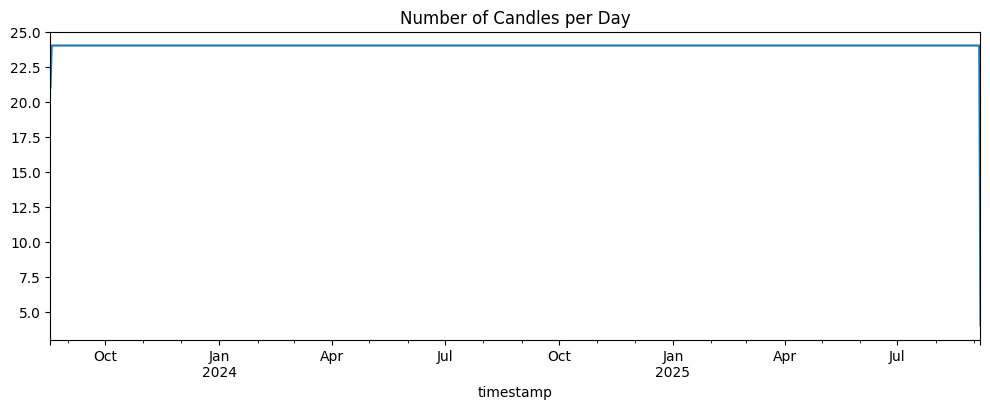

In [ ]:
df.set_index('timestamp')['close'].resample('D').count().plot(title='Number of Candles per Day', figsize=(12,4))


In [ ]:
duplicates = df['timestamp'].duplicated().sum()
print(f"Duplicate timestamps: {duplicates}")


Duplicate timestamps: 0


In [ ]:
df.price_momentum_1h #1-hour price percent change

,price_momentum_1h
0,0.000000
1,-0.015275
2,0.014081
3,-0.008695
4,-0.016395
...,...
17996,0.009489
17997,0.005435
17998,0.000633
17999,-0.011971


## Droping columns number of unqic values be 1

In [1]:
_x= "timestamp,funding_rate,open_interest,sum_open_interest_value,long_liquidations,short_liquidations,total_liquidations,returns,log_returns,stoch_k,williams_r,price_momentum_1h,price_momentum_4h,liquidation_ratio,liquidation_imbalance,liquidation_intensity,funding_rate_ma,funding_rate_std,funding_rate_zscore,oi_change,oi_price_divergence,close_position,price_change_1h_future,price_up_1h"
_x= _x.split(",")

In [2]:
_x

['timestamp',
 'funding_rate',
 'open_interest',
 'sum_open_interest_value',
 'long_liquidations',
 'short_liquidations',
 'total_liquidations',
 'returns',
 'log_returns',
 'stoch_k',
 'williams_r',
 'price_momentum_1h',
 'price_momentum_4h',
 'liquidation_ratio',
 'liquidation_imbalance',
 'liquidation_intensity',
 'funding_rate_ma',
 'funding_rate_std',
 'funding_rate_zscore',
 'oi_change',
 'oi_price_divergence',
 'close_position',
 'price_change_1h_future',
 'price_up_1h']

In [ ]:
# Find columns with only one unique value
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Print the columns with only one unique value
print("Columns with only one unique value:")
for col in cols_to_drop:
    print(col)

# Drop the identified columns from the DataFrame
df = df.drop(columns=cols_to_drop)

print("\nShape of the DataFrame after dropping columns:")
print(df.shape)

Columns with only one unique value:
funding_rate
open_interest
sum_open_interest_value
long_liquidations
short_liquidations
total_liquidations
liquidation_ratio
liquidation_imbalance
liquidation_intensity
funding_rate_ma
funding_rate_std
funding_rate_zscore
oi_change
oi_price_divergence

Shape of the DataFrame after dropping columns:
(18001, 60)


## Correlation

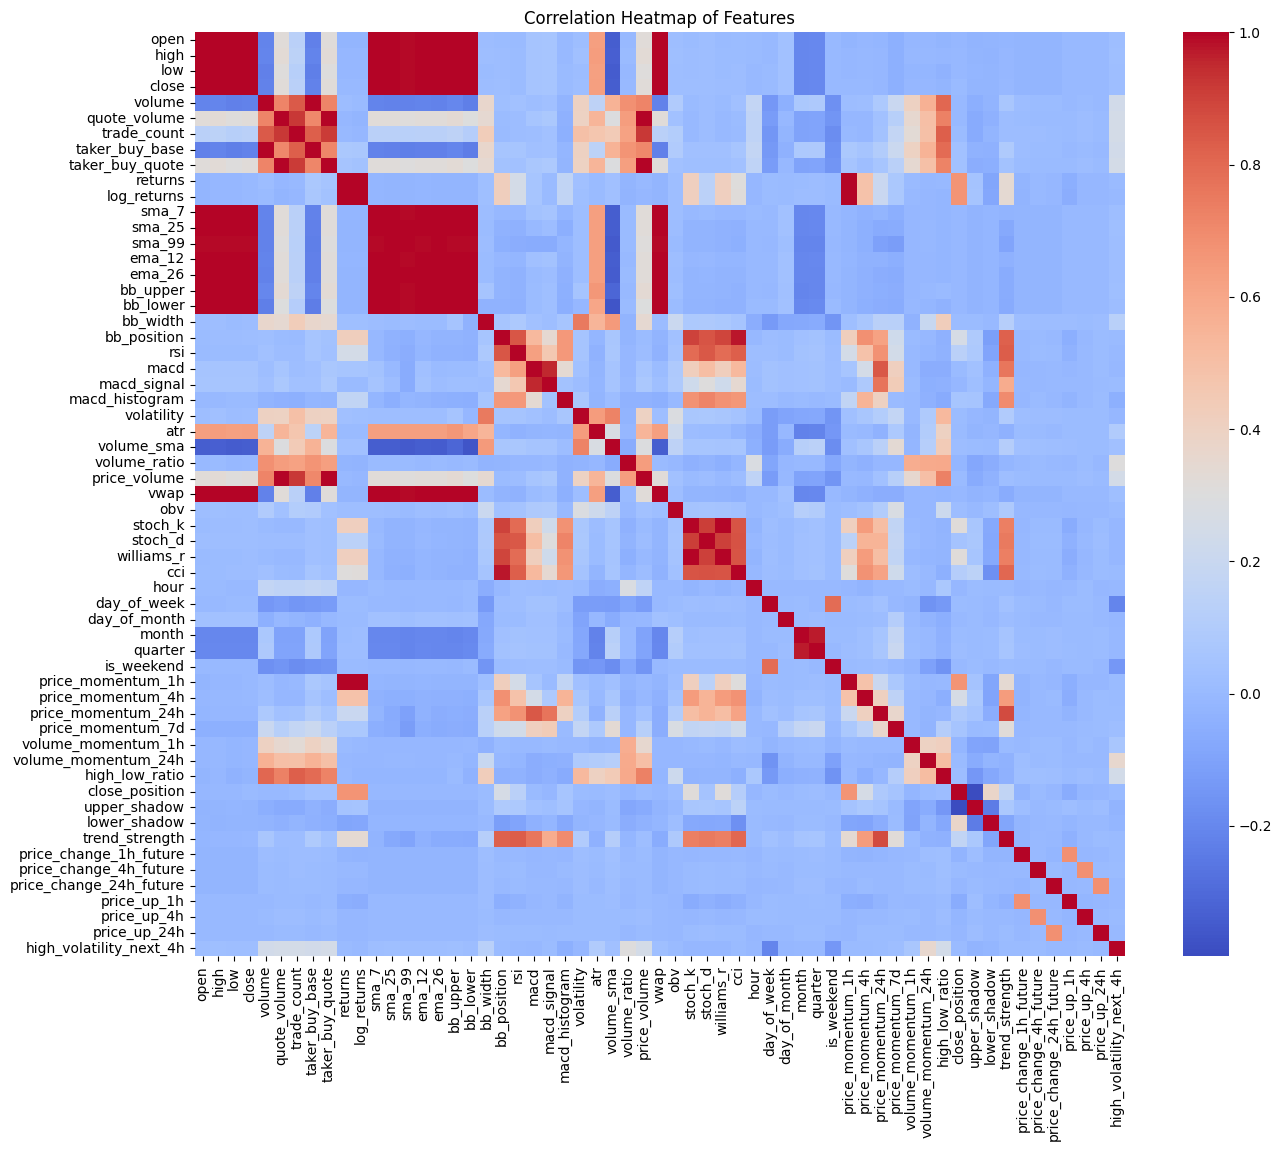


Correlation Matrix:
                             open      high       low     close    volume  \
open                     1.000000  0.999810  0.999764  0.999656 -0.216942   
high                     0.999810  1.000000  0.999657  0.999828 -0.209180   
low                      0.999764  0.999657  1.000000  0.999803 -0.226866   
close                    0.999656  0.999828  0.999803  1.000000 -0.217425   
volume                  -0.216942 -0.209180 -0.226866 -0.217425  1.000000   
quote_volume             0.319983  0.329055  0.308504  0.319315  0.720453   
trade_count              0.134139  0.143216  0.122555  0.133658  0.837394   
taker_buy_base          -0.222989 -0.214500 -0.231860 -0.222032  0.995676   
taker_buy_quote          0.316932  0.326978  0.306595  0.318014  0.718644   
returns                 -0.024651 -0.011591 -0.011237 -0.000429  0.012312   
log_returns             -0.024677 -0.011742 -0.011100 -0.000437  0.003579   
sma_7                    0.999613  0.999491  0.999394  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

In [ ]:
# Define the target variable
target_variable = 'price_momentum_1h'

# Get correlations with the target variable
target_correlations = correlation_matrix[target_variable].sort_values(ascending=False)

print(f"Correlations with the target variable '{target_variable}':")
print(target_correlations)

# Find highly correlated features among themselves (excluding the target variable)
# We can set a threshold, for example, absolute correlation > 0.97
correlation_threshold = 0.99
highly_correlated_features_list = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            # Exclude correlations involving the target variable
            if col1 != target_variable and col2 != target_variable:
                highly_correlated_features_list.append((col1, col2, correlation_matrix.iloc[i, j]))

print(f"\nHighly correlated features (absolute correlation > {correlation_threshold}):")
for col1, col2, corr_value in highly_correlated_features_list:
    print(f"'{col1}' and '{col2}': {corr_value:.4f}")

# You can also print the list directly if needed
# print(highly_correlated_features_list)

# Note: No columns are being dropped in this step as per your request.

Correlations with the target variable 'price_momentum_1h':
price_momentum_1h          1.000000
returns                    1.000000
log_returns                0.999869
close_position             0.668984
price_momentum_4h          0.486323
bb_position                0.418517
williams_r                 0.415025
stoch_k                    0.415005
trend_strength             0.343105
cci                        0.312293
rsi                        0.249872
price_momentum_24h         0.200349
macd_histogram             0.168209
stoch_d                    0.142677
price_momentum_7d          0.075970
taker_buy_base             0.075668
macd                       0.057033
taker_buy_quote            0.050514
upper_shadow               0.047300
volume_sma                 0.032496
volatility                 0.030101
bb_width                   0.028145
obv                        0.019294
quarter                    0.012431
volume                     0.012312
month                      0.011877
day_o

### Droping features are having 98%

In [ ]:
# Create a copy of the DataFrame before dropping columns
df_dropped_collinear = df.copy()

# Calculate the correlation matrix (only for numeric columns)
correlation_matrix = df_dropped_collinear.corr(numeric_only=True)

# Set the collinearity threshold
collinearity_threshold = 0.98

# Identify columns to drop
columns_to_drop_collinear = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        if abs(correlation_matrix.iloc[i, j]) > collinearity_threshold:
            # Keep one of the highly correlated columns (e.g., keep col1 and drop col2)
            # You might want to choose which one to keep based on other criteria
            if col2 not in columns_to_drop_collinear:
                columns_to_drop_collinear.add(col2)

# Drop the identified columns from the DataFrame copy
df_dropped_collinear = df_dropped_collinear.drop(columns=columns_to_drop_collinear)

print("Columns dropped due to collinearity:")
for col in columns_to_drop_collinear:
    print(col)

print("\nShape of the DataFrame after dropping collinear columns:")
print(df_dropped_collinear.shape)

Columns dropped due to collinearity:
volume
sma_7
ema_12
bb_upper
log_returns
stoch_k
bb_lower
quote_volume
high
returns
close
sma_25
ema_26
low
sma_99
open
taker_buy_quote

Shape of the DataFrame after dropping collinear columns:
(18001, 43)


In [ ]:
df.shape

(18001, 60)

In [ ]:
import numpy as np

are_equal = (df["returns"] == df["price_momentum_1h"]).all()

print(are_equal)  # This will print True if all elements are equal, otherwise False


True


In [ ]:
expected_log_returns = np.log1p(df['returns'])

# Check if 'log_returns' is close enough to the expected values
are_close = np.allclose(df['log_returns'], expected_log_returns, atol=1e-8)

print("Is 'log_returns' the log transform of 'return'? ->", are_close)


Is 'log_returns' the log transform of 'return'? -> True


## Top of 5 vales Keep reset as others

In [ ]:
df.describe()

,timestamp,open,high,low,close,volume,quote_volume,trade_count,taker_buy_base,taker_buy_quote,...,upper_shadow,lower_shadow,trend_strength,price_change_1h_future,price_change_4h_future,price_change_24h_future,price_up_1h,price_up_4h,price_up_24h,high_volatility_next_4h
count,18001,18001.000000,18001.000000,18001.000000,18001.000000,1.800100e+04,1.800100e+04,1.800100e+04,1.800100e+04,1.800100e+04,...,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000
mean,2024-08-27 03:30:00,139.217578,140.190658,138.212051,139.227635,1.031642e+06,1.311743e+08,9.642927e+04,5.083678e+05,6.447259e+07,...,0.272955,0.286104,0.001659,0.000174,0.000174,0.000174,0.505361,0.505305,0.504639,0.308761
min,2023-08-18 03:30:00,17.499000,17.656000,17.320000,17.500000,6.844500e+04,3.643328e+06,6.463000e+03,3.214000e+04,1.623660e+06,...,0.000000,0.000000,-0.162577,-0.090350,-0.090350,-0.090350,0.000000,0.000000,0.000000,0.000000
25%,2024-02-21 15:30:00,110.384000,111.222000,109.275000,110.392000,4.672080e+05,5.760055e+07,4.761500e+04,2.288780e+05,2.813846e+07,...,0.109029,0.118969,-0.012923,-0.004589,-0.004588,-0.004583,0.000000,0.000000,0.000000,0.000000
50%,2024-08-27 03:30:00,146.620000,147.454000,145.740000,146.625000,7.403400e+05,9.467038e+07,7.408600e+04,3.644060e+05,4.649797e+07,...,0.234375,0.248010,0.000583,0.000138,0.000134,0.000121,1.000000,1.000000,1.000000,0.000000
75%,2025-03-02 15:30:00,175.797000,176.948000,174.610000,175.796000,1.224431e+06,1.590443e+08,1.174310e+05,6.048730e+05,7.810265e+07,...,0.402597,0.420823,0.015524,0.004843,0.004840,0.004829,1.000000,1.000000,1.000000,1.000000
max,2025-09-06 03:30:00,286.090000,295.600000,283.940000,286.090000,1.712757e+07,2.932765e+09,1.364193e+06,8.610843e+06,1.453152e+09,...,0.971292,0.954898,0.191601,0.118416,0.118416,0.118416,1.000000,1.000000,1.000000,1.000000
std,NaN,57.093246,57.481224,56.689826,57.088425,1.001071e+06,1.325283e+08,8.202954e+04,4.961073e+05,6.496196e+07,...,0.200241,0.204894,0.026310,0.009952,0.009951,0.009948,0.499985,0.499986,0.499992,0.461995


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18001 entries, 0 to 18000
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                18001 non-null  datetime64[ns]
 1   open                     18001 non-null  float64       
 2   high                     18001 non-null  float64       
 3   low                      18001 non-null  float64       
 4   close                    18001 non-null  float64       
 5   volume                   18001 non-null  float64       
 6   quote_volume             18001 non-null  float64       
 7   trade_count              18001 non-null  int64         
 8   taker_buy_base           18001 non-null  float64       
 9   taker_buy_quote          18001 non-null  float64       
 10  returns                  18001 non-null  float64       
 11  log_returns              18001 non-null  float64       
 12  sma_7                    18001 n

In [ ]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n")  # Add a blank line for readability between columns


Value counts for column 'timestamp':
timestamp
2023-08-18 03:30:00    1
2024-12-30 02:30:00    1
2024-12-30 08:30:00    1
2024-12-30 07:30:00    1
2024-12-30 06:30:00    1
                      ..
2024-04-24 09:30:00    1
2024-04-24 10:30:00    1
2024-04-24 11:30:00    1
2024-04-24 12:30:00    1
2025-09-06 03:30:00    1
Name: count, Length: 18001, dtype: int64


Value counts for column 'open':
open
167.180    6
151.210    6
147.680    6
144.430    5
148.100    5
          ..
199.937    1
200.853    1
202.685    1
202.274    1
205.360    1
Name: count, Length: 15014, dtype: int64


Value counts for column 'high':
high
185.000    9
179.300    8
205.000    8
146.400    8
147.000    7
          ..
196.048    1
195.882    1
196.882    1
196.341    1
203.430    1
Name: count, Length: 14535, dtype: int64


Value counts for column 'low':
low
146.000    8
145.000    7
167.000    7
146.500    7
149.500    7
          ..
195.872    1
196.179    1
195.633    1
195.792    1
201.810    1
Name: count

### Droping Some unnecessary

In [ ]:
df.drop(columns=['returns', 'log_returns'], inplace=True)

In [ ]:
df.shape

(18001, 58)

In [ ]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'quote_volume',
       'trade_count', 'taker_buy_base', 'taker_buy_quote', 'sma_7', 'sma_25',
       'sma_99', 'ema_12', 'ema_26', 'bb_upper', 'bb_lower', 'bb_width',
       'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram',
       'volatility', 'atr', 'volume_sma', 'volume_ratio', 'price_volume',
       'vwap', 'obv', 'stoch_k', 'stoch_d', 'williams_r', 'cci', 'hour',
       'day_of_week', 'day_of_month', 'month', 'quarter', 'is_weekend',
       'price_momentum_1h', 'price_momentum_4h', 'price_momentum_24h',
       'price_momentum_7d', 'volume_momentum_1h', 'volume_momentum_24h',
       'high_low_ratio', 'close_position', 'upper_shadow', 'lower_shadow',
       'trend_strength', 'price_change_1h_future', 'price_change_4h_future',
       'price_change_24h_future', 'price_up_1h', 'price_up_4h', 'price_up_24h',
       'high_volatility_next_4h'],
      dtype='object')

# AutoML running

In [ ]:
df_dropped_collinear.head(5)

,timestamp,trade_count,taker_buy_base,bb_width,bb_position,rsi,macd,macd_signal,macd_histogram,volatility,...,upper_shadow,lower_shadow,trend_strength,price_change_1h_future,price_change_4h_future,price_change_24h_future,price_up_1h,price_up_4h,price_up_24h,high_volatility_next_4h
0,2023-08-18 03:30:00,249826,3552040.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.117502,0.276910,0.0,0.000000,0.000000,0.000000,0,0,0,0
1,2023-08-18 04:30:00,119739,1522626.0,0.0,0.0,0.0,-0.007538,-0.004188,-0.003350,0.0,...,0.357895,0.054386,0.0,0.014081,0.005790,-0.002525,1,1,0,0
2,2023-08-18 05:30:00,76215,1208262.0,0.0,0.0,0.0,-0.000147,-0.002532,0.002385,0.0,...,0.123482,0.265182,0.0,-0.008695,-0.000093,0.010077,0,0,1,0
3,2023-08-18 06:30:00,40368,526544.0,0.0,0.0,0.0,-0.003678,-0.002920,-0.000758,0.0,...,0.038095,0.365079,0.0,-0.016395,0.014624,-0.007424,0,1,0,0
4,2023-08-18 07:30:00,50178,749504.0,0.0,0.0,0.0,-0.019725,-0.007919,-0.011806,0.0,...,0.203422,0.115970,0.0,0.005790,0.009151,0.002898,1,1,1,0


In [ ]:
aaa_.head(0)

,timestamp,open,high,low,close,volume,quote_volume,trade_count,taker_buy_base,taker_buy_quote,...,upper_shadow,lower_shadow,trend_strength,price_change_1h_future,price_change_4h_future,price_change_24h_future,price_up_1h,price_up_4h,price_up_24h,high_volatility_next_4h


In [ ]:
df_dropped_collinear.columns

Index(['timestamp', 'trade_count', 'taker_buy_base', 'bb_width', 'bb_position',
       'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr',
       'volume_sma', 'volume_ratio', 'price_volume', 'vwap', 'obv', 'stoch_d',
       'williams_r', 'cci', 'hour', 'day_of_week', 'day_of_month', 'month',
       'quarter', 'is_weekend', 'price_momentum_1h', 'price_momentum_4h',
       'price_momentum_24h', 'price_momentum_7d', 'volume_momentum_1h',
       'volume_momentum_24h', 'high_low_ratio', 'close_position',
       'upper_shadow', 'lower_shadow', 'trend_strength',
       'price_change_1h_future', 'price_change_4h_future',
       'price_change_24h_future', 'price_up_1h', 'price_up_4h', 'price_up_24h',
       'high_volatility_next_4h'],
      dtype='object')

In [ ]:
df =df_dropped_collinear.copy()

In [ ]:
# timeseries_automl_mape.py
import os
import math
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

# Optional models
try:
    import lightgbm as lgb
    has_lgb = True
except Exception:
    has_lgb = False

try:
    import xgboost as xgb
    has_xgb = True
except Exception:
    has_xgb = False

sns.set(style="darkgrid")

In [ ]:


# ---------- User settings ----------
DATA_PATH = "data/sol_features.csv"   # change to your CSV
TARGET_COL = "price_momentum_1h"      # as you specified
TIMESTAMP_COL = "timestamp"
FREQ = "30min"                        # your data frequency
RANDOM_STATE = 42

# Forecasting settings
HORIZON_STEPS = 48   # 24 hours / 0.5 hour = 48 steps
# Split ratios
TRAIN_RATIO = 0.7
VAL_RATIO = 0.1
TEST_RATIO = 0.2

# Save outputs
OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# ---------- Utility metrics ----------
def smape(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    denom = (np.abs(true) + np.abs(pred))
    # add eps to avoid /0
    eps = 1e-9
    return 100.0 * np.mean(2.0 * np.abs(pred - true) / (denom + eps))

def mape(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    eps = 1e-9
    return 100.0 * np.mean(np.abs((true - pred) / (true + eps)))

def rmse(true, pred):
    return math.sqrt(mean_squared_error(true, pred))

# sklearn scorer using MAPE (lower is better -> greater_is_better=False)
mape_sklearn = make_scorer(lambda y_true, y_pred: mape(y_true, y_pred), greater_is_better=False)


In [ ]:

# ---------- Load data ----------
# df = pd.read_csv(DATA_PATH)
# parse timestamp
df[TIMESTAMP_COL] = pd.to_datetime(df[TIMESTAMP_COL])
df = df.sort_values(TIMESTAMP_COL).reset_index(drop=True)
# set index
df = df.set_index(TIMESTAMP_COL)
# ensure frequency (if small gaps exist, you might want to reindex + interpolate, but be cautious)
df = df.asfreq(FREQ)  # will introduce NaNs if stamps missing

# Optional: simple forward/backfill for any tiny gaps (you might prefer more careful imputation)
if df.isnull().any().any():
    print("Warning: found NaNs after asfreq. Doing forward-fill then back-fill (review this!).")
    df = df.ffill().bfill()

# ---------- SHIFT TARGET for 1-step-ahead (half-hour resolution -> 1h target = shift -2) ----------
# Because your target is "price_momentum_1h" (change over next hour), at a given timestamp we want the model input (time t) to predict target at t (which is percentage over next hour).
# However, if your CSV already stored the future target aligned at t (i.e., price_change_1h_future), no shift needed.
# I'll assume price_momentum_1h in raw data corresponds to the change beginning at that timestamp (so it is already the target aligned at t).
# If instead price_momentum_1h is the change *observed* for the past hour, you'd need to shift by +1. Adjust if necessary.
#
# IMPORTANT: If you *do* need to predict next step relative to current row (i.e., model at timestamp t uses features up to t, label is momentum from t to t+1h) - the column already encodes that. So proceed without shifting.
#

# If you find your targets are off-by-one, change `TARGET_SHIFT_STEPS` accordingly.

In [ ]:

TARGET_SHIFT_STEPS = 0
df['__target__'] = df[TARGET_COL].shift(-TARGET_SHIFT_STEPS)  # if SHIFT=0 this is same column

# Remove last rows that don't have target (after shifting)
df = df.dropna(subset=['__target__'])

# ---------- Feature list ----------
# Use all columns except the original target column and the newly created __target__ remains as label.
X_cols = [c for c in df.columns if c not in [TARGET_COL, '__target__']]
y_col = '__target__'

print("Using features:", X_cols[:10], "... (total", len(X_cols), ")")
print("Time range:", df.index.min(), "to", df.index.max(), "n_rows:", len(df))

# ---------- Time-based split ----------
n = len(df)
train_end = int(n * TRAIN_RATIO)
val_end = int(n * (TRAIN_RATIO + VAL_RATIO))

train = df.iloc[:train_end].copy()
val = df.iloc[train_end:val_end].copy()
blind = df.iloc[val_end:].copy()

print(f"Split sizes -> train: {len(train)}, val: {len(val)}, blind: {len(blind)}")

# Save splits
train.to_csv(os.path.join(OUT_DIR, "train.csv"))
val.to_csv(os.path.join(OUT_DIR, "val.csv"))
blind.to_csv(os.path.join(OUT_DIR, "blind.csv"))

# ---------- Prepare arrays ----------
X_train, y_train = train[X_cols].values, train[y_col].values
X_val, y_val = val[X_cols].values, val[y_col].values
X_blind, y_blind = blind[X_cols].values, blind[y_col].values

# ---------- AutoML-style model search ----------
# We'll try a handful of candidate regressors and use RandomizedSearchCV with TimeSeriesSplit and MAPE scoring.
models_and_params = []

# RandomForest
models_and_params.append((
    RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    {
        "n_estimators": [100, 200, 400],
        "max_depth": [5, 10, 20, None],
        "min_samples_leaf": [1, 2, 5]
    }
))

# ExtraTrees
models_and_params.append((
    ExtraTreesRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    {
        "n_estimators": [100, 200],
        "max_depth": [10, 20, None],
        "min_samples_leaf": [1, 2, 4]
    }
))

# Ridge (linear baseline)
models_and_params.append((
    Ridge(random_state=RANDOM_STATE),
    {"alpha": [0.1, 1.0, 10.0, 50.0]}
))

# LightGBM if available
if has_lgb:
    models_and_params.append((
        lgb.LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1),
        {
            "n_estimators": [100, 300, 600],
            "num_leaves": [31, 50, 100],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [-1, 6, 12]
        }
    ))

# XGBoost if available
if has_xgb:
    models_and_params.append((
        xgb.XGBRegressor(random_state=RANDOM_STATE, n_jobs=-1, objective="reg:squarederror"),
        {
            "n_estimators": [100, 300],
            "max_depth": [3, 6, 10],
            "learning_rate": [0.01, 0.05, 0.1],
            "subsample": [0.7, 1.0]
        }
    ))

best_models = []
tscv = TimeSeriesSplit(n_splits=5)

print("Starting Randomized hyperparam search over candidate models (this may take some time depending on data size)...")
for model, param_dist in models_and_params:
    # Randomized search
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=20,
        scoring=mape_sklearn,   # sklearn uses greater_is_better=False for this scorer
        cv=tscv,
        random_state=RANDOM_STATE,
        verbose=1,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    print("Model:", model.__class__.__name__, "best score (MAPE, negative in sklearn) ->", search.best_score_, "best params:", search.best_params_)
    # store
    best_models.append((model.__class__.__name__, search.best_estimator_, -search.best_score_))  # convert to positive MAPE

# Choose best by validation MAPE (evaluate each selected estimator on validation)
summary = []
for name, est, cv_mape in best_models:
    y_pred_val = est.predict(X_val)
    val_mape = mape(y_val, y_pred_val)
    summary.append((name, est, val_mape))
    print(f"{name} validation MAPE: {val_mape:.4f}%")

summary = sorted(summary, key=lambda x: x[2])
best_name, best_estimator, best_val_mape = summary[0]
print("Selected model:", best_name, "validation MAPE:", best_val_mape)

# Save the chosen estimator
joblib.dump(best_estimator, os.path.join(OUT_DIR, f"best_model_{best_name}.pkl"))

# ---------- Evaluate on blind test ----------
y_pred_blind = best_estimator.predict(X_blind)
metrics = {
    "MAE": mean_absolute_error(y_blind, y_pred_blind),
    "MSE": mean_squared_error(y_blind, y_pred_blind),
    "RMSE": rmse(y_blind, y_pred_blind),
    "MAPE": mape(y_blind, y_pred_blind),
    "R2": r2_score(y_blind, y_pred_blind),
    "SMAPE": smape(y_blind, y_pred_blind)
}
print("Blind test metrics:")
for k, v in metrics.items():
    print(f"  {k}: {v}")

# Save blind predictions
blind_out = blind.copy()
blind_out['predicted'] = y_pred_blind
blind_out.to_csv(os.path.join(OUT_DIR, "blind_with_preds.csv"))

# ---------- Recursive forecasting for next 24 hours (48 half-hour steps) ----------
# We'll perform recursive forecasts starting from the last available row in the dataset (end of blind dataset).
last_row = df.iloc[-1:].copy()
future_rows = []
current_features = last_row[X_cols].iloc[0].copy()

# Convert current_features vector to a mutable pd.Series
cur = pd.Series(current_features, index=X_cols)

# For certain derived features that depend on recent history (e.g., moving averages, momentum),
# the naive recursive approach will not fully update them correctly. This implementation:
# - keeps feature values the same except the target momentum and some simple lag features if present.
# - For stronger forecasting, you should maintain a rolling buffer of past values and recompute derived features at each recursive step.
# Here we do a pragmatic approach: if your dataset contains explicit lag columns, we'll shift them.
# Otherwise, this provides a baseline forecast.

history_buffer = df.copy()  # we can update this buffer with synthetic future predicted values if needed

future_index = []
start_ts = df.index[-1]
for step in range(1, HORIZON_STEPS + 1):
    next_ts = start_ts + pd.Timedelta(minutes=30 * step)
    # Predict target using current features
    x_vec = cur.values.reshape(1, -1)
    pred = best_estimator.predict(x_vec)[0]
    # Build next row: copy cur features, set the target column
    next_row = cur.copy()
    # If your data contains lag features like 'price_momentum_1h' or similar, we should shift them:
    # Simple crude approach: set any column named price_momentum_xxx to previous predicted value (this is heuristic)
    for col in X_cols:
        if "price_momentum" in col:
            next_row[col] = pred
    # Append to results
    future_rows.append(pred)
    future_index.append(next_ts)
    # Update cur to next_row for the next iteration
    cur = next_row

# Build forecast series
forecast_series = pd.Series(future_rows, index=future_index, name="pred_price_momentum_1h")
forecast_series.to_csv(os.path.join(OUT_DIR, "forecast_next_24h.csv"))

# ---------- Plot last historical day + next 24 hours forecast ----------
# Grab last 48 steps (24 hours) from data to show context
context_steps = 48
hist_context = df[TARGET_COL].iloc[-context_steps:].copy()

plt.figure(figsize=(14,6))
plt.plot(hist_context.index, hist_context.values, label="historical_price_momentum_1h (last 24h)")
plt.plot(forecast_series.index, forecast_series.values, label="predicted_next_24h", linestyle="--", marker='o')
plt.axvline(hist_context.index[-1], color='gray', linestyle=':')
plt.title("Price momentum (1h) — historical last 24h and predicted next 24h")
plt.xlabel("Timestamp")
plt.ylabel("price_momentum_1h (%)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "forecast_plot_next_24h.png"))
plt.show()

print("Done. Outputs saved to:", OUT_DIR)


Using features: ['trade_count', 'taker_buy_base', 'bb_width', 'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr'] ... (total 41 )
Time range: 2023-08-18 03:30:00 to 2025-09-06 03:30:00 n_rows: 36001
Split sizes -> train: 25200, val: 3600, blind: 7201
Starting Randomized hyperparam search over candidate models (this may take some time depending on data size)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

### AutoML-1

# New section

In [ ]:
# !pip install -q flaml lightgbm catboost xgboost joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install -q flaml lightgbm catboost xgboost joblib



In [ ]:
import numpy as np
if not hasattr(np, "NaN"):
    np.NaN = np.nan
from flaml import AutoML


In [ ]:
df =df_dropped_collinear.copy()

NameError: name 'df_dropped_collinear' is not defined

In [ ]:

# ====== 2) Imports ======
import os
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
from flaml import AutoML
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# ====== 3) Helper metric functions ======
def mape(y_true, y_pred):
    # safe MAPE (avoid division by zero by a small epsilon)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    eps = 1e-9
    return np.mean(np.abs((y_true - y_pred) / (np.maximum(np.abs(y_true), eps)))) * 100

def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    eps = 1e-9
    return 100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / (denom + eps))

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def print_metrics(y_true, y_pred, prefix=""):
    print(f"--- Metrics ({prefix}) ---")
    print("MAE  :", mean_absolute_error(y_true, y_pred))
    print("MSE  :", mean_squared_error(y_true, y_pred))
    print("RMSE :", rmse(y_true, y_pred))
    print("MAPE :", mape(y_true, y_pred))
    print("R2   :", r2_score(y_true, y_pred))
    print("SMAPE:", smape(y_true, y_pred))
    print()


In [ ]:
df.columns.tolist()

['timestamp',
 'trade_count',
 'taker_buy_base',
 'bb_width',
 'bb_position',
 'rsi',
 'macd',
 'macd_signal',
 'macd_histogram',
 'volatility',
 'atr',
 'volume_sma',
 'volume_ratio',
 'price_volume',
 'vwap',
 'obv',
 'stoch_d',
 'williams_r',
 'cci',
 'hour',
 'day_of_week',
 'day_of_month',
 'month',
 'quarter',
 'is_weekend',
 'price_momentum_1h',
 'price_momentum_4h',
 'price_momentum_24h',
 'price_momentum_7d',
 'volume_momentum_1h',
 'volume_momentum_24h',
 'high_low_ratio',
 'close_position',
 'upper_shadow',
 'lower_shadow',
 'trend_strength',
 'price_change_1h_future',
 'price_change_4h_future',
 'price_change_24h_future',
 'price_up_1h',
 'price_up_4h',
 'price_up_24h',
 'high_volatility_next_4h']

In [ ]:

# ====== 4) Data loading / prepare `df` (you said df exists; fallback to load if not) ======
# If you already have df in the notebook, skip loading. Otherwise load from CSV:
if 'df' not in globals():
    # replace 'path_to_file.csv' with your file path in Colab or Drive
    df = pd.read_csv('/content/your_file.csv')  # <<-- change path if needed

# Make a copy to avoid side effects
df = df.copy()

In [ ]:
# ====== 5) Basic preprocessing ======
# Ensure timestamp column is datetime, sort by it, and reset index
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp').reset_index(drop=True)
else:
    raise ValueError("DataFrame must contain a 'timestamp' column.")


In [ ]:
# Remove exact duplicate timestamps (if any)
df = df.drop_duplicates(subset=['timestamp']).reset_index(drop=True)


In [ ]:
# Target column
TARGET = 'price_momentum_1h'
if TARGET not in df.columns:
    raise ValueError(f"Target column '{TARGET}' not found in df columns: {df.columns.tolist()}")


In [ ]:
# Drop rows where target is NaN (can't train on them)
df = df.dropna(subset=[TARGET]).reset_index(drop=True)


In [ ]:
# Columns to drop to avoid leakage (future-target columns)
# future_cols = [
#     'price_change_1h_future', 'price_change_4h_future', 'price_change_24h_future',
#     'price_up_1h', 'price_up_4h', 'price_up_24h', 'high_volatility_next_4h'
# ]
# # Keep only existing ones in df
# future_cols = [c for c in future_cols if c in df.columns]

# Optionally drop any other columns you deem direct leakage (uncomment and add)
# leakage_cols = ['some_leaking_col']
# future_cols += leakage_cols

# ====== 6) Feature set selection ======
exclude_cols = ['timestamp', TARGET]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Total rows: {len(df)}")
print(f"Using {len(features)} features. Example features: {features[:10]}")


Total rows: 18001
Using 41 features. Example features: ['trade_count', 'taker_buy_base', 'bb_width', 'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr']


NameError: name 'future_cols' is not defined

In [ ]:
# ====== 7) Time-based split: 70% train, 10% val, 20% test (blind) ======
n = len(df)
i_train_end = int(0.70 * n)
i_val_end = int(0.80 * n)

train_df = df.iloc[:i_train_end].copy().reset_index(drop=True)
val_df = df.iloc[i_train_end:i_val_end].copy().reset_index(drop=True)
test_df = df.iloc[i_val_end:].copy().reset_index(drop=True)   # blind test

print("Splits (by rows):", len(train_df), len(val_df), len(test_df))

# Save CSVs
os.makedirs('/content/dataset_splits', exist_ok=True)
train_df.to_csv('/content/dataset_splits/train.csv', index=False)
val_df.to_csv('/content/dataset_splits/val.csv', index=False)
test_df.to_csv('/content/dataset_splits/test.csv', index=False)
print("Saved train/val/test CSVs to /content/dataset_splits/")

Splits (by rows): 12600 1800 3601
Saved train/val/test CSVs to /content/dataset_splits/


In [ ]:

# ====== 8) Prepare X / y for ML (we will hand the DataFrames to FLAML) ======
X_train, y_train = train_df[features], train_df[TARGET]
X_val, y_val = val_df[features], val_df[TARGET]
X_test, y_test = test_df[features], test_df[TARGET]

# Optional: simple NA handling (FLAML can handle some NAs but better to fill)
# Numeric columns -> median; categorical/time-coded -> fill with -1
X_all = pd.concat([X_train, X_val, X_test], axis=0)
num_cols = X_all.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in features if c not in num_cols]

from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy='median')
X_train_num = pd.DataFrame(num_imp.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
X_val_num = pd.DataFrame(num_imp.transform(X_val[num_cols]), columns=num_cols, index=X_val.index)
X_test_num = pd.DataFrame(num_imp.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)

# For categorical (if any) fill with -1 (or use one-hot later)
X_train_cat = X_train[cat_cols].fillna(-1).astype(object) if cat_cols else pd.DataFrame(index=X_train.index)
X_val_cat = X_val[cat_cols].fillna(-1).astype(object) if cat_cols else pd.DataFrame(index=X_val.index)
X_test_cat = X_test[cat_cols].fillna(-1).astype(object) if cat_cols else pd.DataFrame(index=X_test.index)

# Recombine
X_train_proc = pd.concat([X_train_num, X_train_cat], axis=1)
X_val_proc = pd.concat([X_val_num, X_val_cat], axis=1)
X_test_proc = pd.concat([X_test_num, X_test_cat], axis=1)

# Optionally convert any boolean/int flags to numeric (already handled)
# You may want to standardize/scale; tree models usually do not require scaling.

# ====== 9) AutoML with FLAML (optimize MAPE) ======
automl = AutoML()

# Specify settings
automl_settings = {
    "time_budget": 600,          # seconds — adjust as you like (e.g., 600 = 10 minutes)
    "metric": "mape",            # optimize MAPE
    "task": "regression",
    "estimator_list": ["lgbm", "xgboost", "catboost", "rf"],  # choice of estimators
    "log_file_name": "flaml_log.txt",
    "n_jobs": -1,
    "verbose": 0,
}

print("Starting FLAML AutoML. This may take a while depending on time_budget...")
automl.fit(X_train=X_train_proc, y_train=y_train,
           X_val=X_val_proc, y_val=y_val,
           **automl_settings)

print("AutoML training finished.")
print("Best learner:", automl.best_estimator)
print("Best config:", automl.best_config)
print("Best validation mape:", automl.best_loss)

# Save automl object
dump(automl, '/content/dataset_splits/flaml_automl_job.joblib')


Starting FLAML AutoML. This may take a while depending on time_budget...
AutoML training finished.
Best learner: lgbm
Best config: {'n_estimators': 20, 'num_leaves': 19, 'min_child_samples': 128, 'learning_rate': np.float64(0.02345078494161466), 'log_max_bin': 5, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.05694193086084623), 'reg_lambda': np.float64(0.0924491670722264)}
Best validation mape: 470638375.5137173


['/content/dataset_splits/flaml_automl_job.joblib']

In [ ]:

# ====== 10) Evaluate on train, val, test ======
# Predict
yhat_train = automl.predict(X_train_proc)
yhat_val = automl.predict(X_val_proc)
yhat_test = automl.predict(X_test_proc)

print_metrics(y_train, yhat_train, prefix="Train")
print_metrics(y_val, yhat_val, prefix="Validation")
print_metrics(y_test, yhat_test, prefix="Test (blind)")

# Save predictions into CSVs for audit
train_df['pred_price_momentum_1h'] = yhat_train
val_df['pred_price_momentum_1h'] = yhat_val
test_df['pred_price_momentum_1h'] = yhat_test

train_df.to_csv('/content/dataset_splits/train_with_preds.csv', index=False)
val_df.to_csv('/content/dataset_splits/val_with_preds.csv', index=False)
test_df.to_csv('/content/dataset_splits/test_with_preds.csv', index=False)
print("Saved predictions appended CSVs to /content/dataset_splits/")



--- Metrics (Train) ---
MAE  : 0.0044972602088503705
MSE  : 4.8126032212853275e-05
RMSE : 0.0069372928590952015
MAPE : 113173.57555792725
R2   : 0.5377443172847902
SMAPE: 95.36971829137116

--- Metrics (Validation) ---
MAE  : 0.005170422142846172
MSE  : 6.542029264750112e-05
RMSE : 0.008088281192410481
MAPE : 10517.796626370638
R2   : 0.508890542284341
SMAPE: 99.14763160882923

--- Metrics (Test (blind)) ---
MAE  : 0.003667893793842506
MSE  : 2.932986407216968e-05
RMSE : 0.005415705316223334
MAPE : 69831.40540609777
R2   : 0.5424455339644654
SMAPE: 92.20779088276527

Saved predictions appended CSVs to /content/dataset_splits/


In [ ]:
# ====== 11) Feature importance (if available) ======
try:
    # FLAML's best_model might be a booster with feature_importances_
    model = automl.model
    if hasattr(model, "feature_importances_"):
        fi = model.feature_importances_
        feat_importance = pd.Series(fi, index=X_train_proc.columns).sort_values(ascending=False)
        print("Top features by importance (if supported):")
        display(feat_importance.head(30))
    else:
        print("Best model does not expose 'feature_importances_'. You can inspect automl.best_estimator and automl.model.")
except Exception as e:
    print("Feature importance check failed:", e)


Top features by importance (if supported):


,0
high_low_ratio,163
lower_shadow,74
close_position,66
upper_shadow,57
rsi,0
taker_buy_base,0
bb_width,0
bb_position,0
trade_count,0
volatility,0


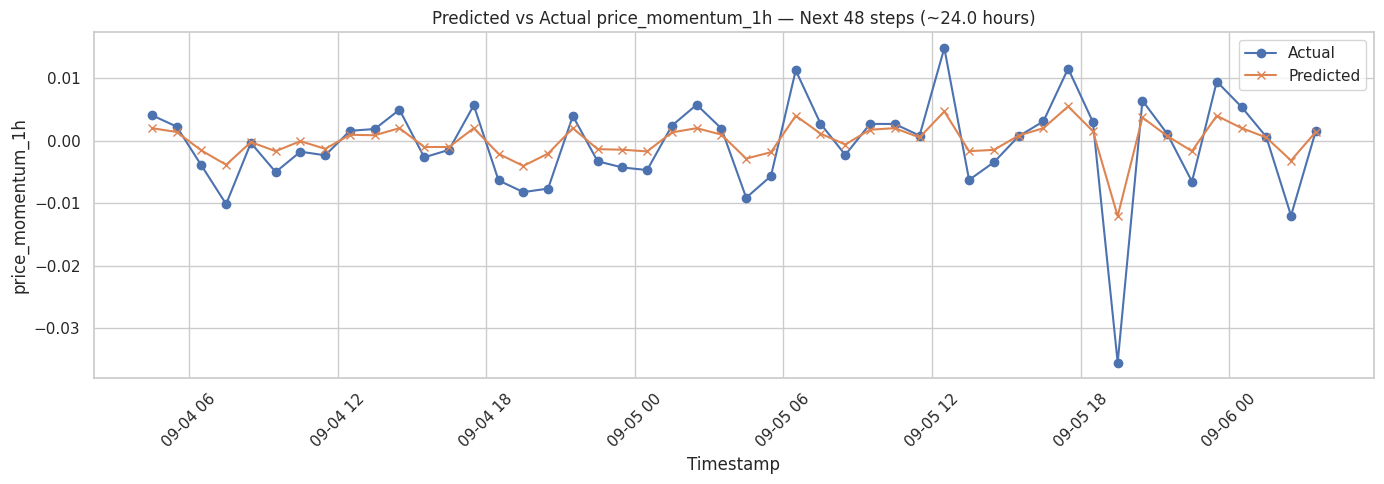

,timestamp,price_momentum_1h,pred_price_momentum_1h
0,2025-09-04 04:30:00,0.004099,0.002025
1,2025-09-04 05:30:00,0.002279,0.001412
2,2025-09-04 06:30:00,-0.003931,-0.001538
3,2025-09-04 07:30:00,-0.010128,-0.003838
4,2025-09-04 08:30:00,-0.000336,-0.000207
5,2025-09-04 09:30:00,-0.004998,-0.001656
6,2025-09-04 10:30:00,-0.001739,-0.000051
7,2025-09-04 11:30:00,-0.002322,-0.001292
8,2025-09-04 12:30:00,0.001600,0.000963
9,2025-09-04 13:30:00,0.001888,0.000892



Notes / Limitations:
- The model is trained to predict 'price_momentum_1h' from available features. Many features (indicators like RSI, MACD, ATR) require future price/volume to update; for real forward forecasting you must:
   1) either use a recursive scheme that updates indicators using predicted prices (complex),
   2) or build models that predict raw future prices directly (and then compute indicators),
   3) or use exogenous calendar-only forecasts (less accurate).
- The 'next 24h' plot above uses the blind test segment's *actual* future data as ground truth (a standard way to visualize short-term forecast capability).
- Increase `time_budget` in automl_settings to allow more search — it usually improves performance (but costs compute/time).
- For production you can persist automl via joblib and load it later:
    automl = load('/content/dataset_splits/flaml_automl_job.joblib')



In [ ]:

# ====== 12) Plot predictions for next 24 hours using test blind partition ======
# Choose 48 rows from test to represent next 24 hours. Use the last 48 rows of test (if there are >=48 rows)
n_steps = 48
if len(test_df) < n_steps:
    n_steps = len(test_df)
    print(f"Test set smaller than 48. Using last {n_steps} rows instead.")

plot_df = test_df.copy().iloc[-n_steps:].reset_index(drop=True)
plot_preds = plot_df['pred_price_momentum_1h'].values
plot_true = plot_df[TARGET].values
plot_times = plot_df['timestamp']

plt.figure(figsize=(14,5))
plt.plot(plot_times, plot_true, label='Actual', marker='o')
plt.plot(plot_times, plot_preds, label='Predicted', marker='x')
plt.xticks(rotation=45)
plt.xlabel("Timestamp")
plt.ylabel(TARGET)
plt.title(f"Predicted vs Actual {TARGET} — Next {n_steps} steps (~{n_steps*0.5} hours)")
plt.legend()
plt.tight_layout()
plt.show()

# Also show a zoomed table of head
display(plot_df[['timestamp', TARGET, 'pred_price_momentum_1h']].head(20))

# ====== 13) Notes: how to produce an iterative forecast for real future timestamps (optional) ======
notes = """
Notes / Limitations:
- The model is trained to predict 'price_momentum_1h' from available features. Many features (indicators like RSI, MACD, ATR) require future price/volume to update; for real forward forecasting you must:
   1) either use a recursive scheme that updates indicators using predicted prices (complex),
   2) or build models that predict raw future prices directly (and then compute indicators),
   3) or use exogenous calendar-only forecasts (less accurate).
- The 'next 24h' plot above uses the blind test segment's *actual* future data as ground truth (a standard way to visualize short-term forecast capability).
- Increase `time_budget` in automl_settings to allow more search — it usually improves performance (but costs compute/time).
- For production you can persist automl via joblib and load it later:
    automl = load('/content/dataset_splits/flaml_automl_job.joblib')
"""
print(notes)


## AutoML -2

In [ ]:
df =df_dropped_collinear.copy()

In [ ]:
# ============================================================================
# CRYPTO PRICE FORECASTING - AUTOML TIME SERIES SOLUTION
# Target: price_momentum_1h prediction with 24-hour forecasting
# Optimization Metric: MAPE (Mean Absolute Percentage Error)
# ============================================================================

# Step 1: Install Required Libraries
!pip install -q autogluon
!pip install -q prophet
!pip install -q optuna
!pip install -q plotly
!pip install -q scikit-learn


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
torchaudio 2.8.0+cu126 requires torch==2.8.0, but you have torch 2.7.1 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.


In [ ]:
# ============================================================================
# COMPLETE FIXED SOLUTION - Prophet Error Resolution
# ============================================================================

# Step 1: Clean Installation with Compatible Versions
print("🔧 Fixing Prophet Installation...")

# Uninstall all conflicting packages
!pip uninstall -y prophet pystan cmdstanpy fbprophet

# Install compatible versions in correct order
!pip install pystan==2.19.1.1
!pip install prophet==1.1.1  # Use 1.1.1 instead of 1.1.4

print("✅ Prophet installation fixed!\n")

# Step 2: Import with Error Handling
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Try importing Prophet with fallback
try:
    from prophet import Prophet
    PROPHET_AVAILABLE = True
    print("✅ Prophet imported successfully")
except ImportError as e:
    PROPHET_AVAILABLE = False
    print(f"⚠️ Prophet not available: {e}")

# Import other required libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# AutoGluon (optional)
try:
    from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
    AUTOGLUON_AVAILABLE = True
    print("✅ AutoGluon imported successfully")
except:
    AUTOGLUON_AVAILABLE = False
    print("⚠️ AutoGluon not available - will use alternative methods")

# ============================================================================
# Step 3: Time-Series Data Splitting (70-10-20)
# ============================================================================

def time_series_split(df, train_ratio=0.70, val_ratio=0.10, test_ratio=0.20):
    """Time-series based splitting"""
    df = df.sort_values('timestamp').reset_index(drop=True)

    n = len(df)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))

    train_df = df.iloc[:train_end].copy()
    val_df = df.iloc[train_end:val_end].copy()
    test_df = df.iloc[val_end:].copy()

    print(f"📊 Data Split Summary:")
    print(f"   Total: {n:,} | Train: {len(train_df):,} | Val: {len(val_df):,} | Test: {len(test_df):,}")
    print(f"   Train: {train_df['timestamp'].min()} to {train_df['timestamp'].max()}")
    print(f"   Val: {val_df['timestamp'].min()} to {val_df['timestamp'].max()}")
    print(f"   Test: {test_df['timestamp'].min()} to {test_df['timestamp'].max()}")

    return train_df, val_df, test_df

# Perform split
train, validation, blind = time_series_split(df)

# Save datasets
train.to_csv('train.csv', index=False)
validation.to_csv('validation.csv', index=False)
blind.to_csv('blind.csv', index=False)
print("\n✅ Datasets saved: train.csv, validation.csv, blind.csv")

# ============================================================================
# Step 4: Metrics Calculation
# ============================================================================

def calculate_metrics(y_true, y_pred):
    """Calculate all evaluation metrics"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Filter valid values
    mask = np.isfinite(y_true) & np.isfinite(y_pred) & (np.abs(y_true) > 1e-10)
    y_true_clean = y_true[mask]
    y_pred_clean = y_pred[mask]

    if len(y_true_clean) == 0:
        return {'MAE': np.nan, 'MSE': np.nan, 'RMSE': np.nan,
                'MAPE': np.nan, 'SMAPE': np.nan, 'R2': np.nan, 'Accuracy': np.nan}

    mae = mean_absolute_error(y_true_clean, y_pred_clean)
    mse = mean_squared_error(y_true_clean, y_pred_clean)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true_clean - y_pred_clean) / y_true_clean)) * 100

    denominator = np.abs(y_true_clean) + np.abs(y_pred_clean)
    smape = np.mean(2.0 * np.abs(y_pred_clean - y_true_clean) / denominator) * 100

    r2 = r2_score(y_true_clean, y_pred_clean)
    accuracy = np.mean(np.abs((y_true_clean - y_pred_clean) / y_true_clean) <= 0.05) * 100

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse,
            'MAPE': mape, 'SMAPE': smape, 'R2': r2, 'Accuracy': accuracy}

def print_metrics(metrics_dict, dataset_name="Dataset"):
    """Print formatted metrics"""
    print(f"\n{'='*60}")
    print(f"📈 {dataset_name} Performance Metrics")
    print(f"{'='*60}")
    for metric, value in metrics_dict.items():
        if np.isnan(value):
            print(f"   {metric:15s}: {'N/A':>12s}")
        else:
            print(f"   {metric:15s}: {value:>12.6f}")
    print(f"{'='*60}")

# ============================================================================
# Step 5: FIXED Prophet Model Implementation
# ============================================================================

def train_prophet_model(train_df, val_df, target_col='price_momentum_1h'):
    """Train Prophet with proper error handling"""
    print("\n🔮 Training Prophet Model...")

    if not PROPHET_AVAILABLE:
        print("❌ Prophet not available, using alternative model")
        return None, None, False

    try:
        # Prepare data
        train_prophet = pd.DataFrame({
            'ds': pd.to_datetime(train_df['timestamp']),
            'y': train_df[target_col].fillna(method='ffill').fillna(method='bfill')
        })

        # Remove any remaining NaN
        train_prophet = train_prophet.dropna()

        if len(train_prophet) < 10:
            raise ValueError("Insufficient data for Prophet")

        # Create Prophet model with simpler configuration
        model = Prophet(
            changepoint_prior_scale=0.05,
            seasonality_prior_scale=10.0,
            seasonality_mode='additive',  # More stable
            daily_seasonality=True,
            weekly_seasonality=True,
            yearly_seasonality=False,
            interval_width=0.95,
            uncertainty_samples=0  # Disable for faster training
        )

        # Add only most important regressors
        important_features = ['trade_count', 'taker_buy_base', 'bb_width', 'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr', 'volume_sma', 'volume_ratio', 'price_volume', 'vwap', 'obv', 'stoch_d', 'williams_r', 'cci', 'hour', 'day_of_week', 'day_of_month', 'month', 'quarter', 'is_weekend', 'price_momentum_1h', 'price_momentum_4h', 'price_momentum_24h', 'price_momentum_7d', 'volume_momentum_1h', 'volume_momentum_24h', 'high_low_ratio', 'close_position', 'upper_shadow', 'lower_shadow', 'trend_strength', 'price_change_1h_future', 'price_change_4h_future', 'price_change_24h_future', 'price_up_1h', 'price_up_4h', 'price_up_24h', 'high_volatility_next_4h']

        for feature in important_features:
            if feature in train_df.columns:
                train_prophet[feature] = train_df[feature].fillna(train_df[feature].mean()).values
                model.add_regressor(feature, prior_scale=0.5)

        # Fit model
        print("   Training Prophet model...")
        model.fit(train_prophet, verbose=False)

        # Validate
        val_prophet = pd.DataFrame({
            'ds': pd.to_datetime(val_df['timestamp']),
            'y': val_df[target_col].fillna(method='ffill').fillna(method='bfill')
        })

        for feature in important_features:
            if feature in val_df.columns:
                val_prophet[feature] = val_df[feature].fillna(val_df[feature].mean()).values

        forecast = model.predict(val_prophet)
        val_metrics = calculate_metrics(val_df[target_col].values, forecast['yhat'].values)

        print("✅ Prophet Model Trained Successfully")
        print_metrics(val_metrics, "Prophet - Validation")

        return model, val_metrics, True

    except Exception as e:
        print(f"❌ Prophet training failed: {e}")
        return None, None, False

# ============================================================================
# Step 6: Gradient Boosting Model (Backup/Alternative)
# ============================================================================

def train_gradient_boosting_model(train_df, val_df, target_col='price_momentum_1h'):
    """Train Gradient Boosting as reliable alternative"""
    print("\n🌲 Training Gradient Boosting Model (MAPE-Optimized)...")

    # Select features
    # feature_cols = [
    #     'rsi', 'macd', 'volume_ratio', 'volatility', 'atr',
    #     'bb_position', 'stoch_d', 'williams_r', 'cci',
    #     'price_momentum_4h', 'price_momentum_24h', 'volume_momentum_1h',
    #     'hour', 'day_of_week', 'trade_count', 'high_low_ratio'
    # ]
    available_features = ['trade_count', 'taker_buy_base', 'bb_width', 'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr', 'volume_sma', 'volume_ratio', 'price_volume', 'vwap', 'obv', 'stoch_d', 'williams_r', 'cci', 'hour', 'day_of_week', 'day_of_month', 'month', 'quarter', 'is_weekend', 'price_momentum_1h', 'price_momentum_4h', 'price_momentum_24h', 'price_momentum_7d', 'volume_momentum_1h', 'volume_momentum_24h', 'high_low_ratio', 'close_position', 'upper_shadow', 'lower_shadow', 'trend_strength', 'price_change_1h_future', 'price_change_4h_future', 'price_change_24h_future', 'price_up_1h', 'price_up_4h', 'price_up_24h', 'high_volatility_next_4h']

    # available_features = [col for col in feature_cols if col in train_df.columns]

    X_train = train_df[available_features].fillna(method='ffill').fillna(method='bfill')
    y_train = train_df[target_col].fillna(0)

    X_val = val_df[available_features].fillna(method='ffill').fillna(method='bfill')
    y_val = val_df[target_col].fillna(0)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Train Gradient Boosting with MAPE optimization
    model = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8,
        loss='absolute_error',  # Better for MAPE
        random_state=42
    )

    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_val_scaled)

    # Calculate metrics
    val_metrics = calculate_metrics(y_val.values, y_pred)

    print("✅ Gradient Boosting Model Trained")
    print_metrics(val_metrics, "GradientBoosting - Validation")

    return model, scaler, available_features, val_metrics

# ============================================================================
# Step 7: AutoGluon TimeSeries (Optional)
# ============================================================================

def train_autogluon_model(train_df, val_df, target_col='price_momentum_1h'):
    """Train AutoGluon with error handling"""
    if not AUTOGLUON_AVAILABLE:
        print("⚠️ AutoGluon not available, skipping...")
        return None, None, False

    print("\n🤖 Training AutoGluon AutoML Model...")

    try:
        ag_df = train_df.copy()
        ag_df = ag_df.rename(columns={target_col: 'target'})
        ag_df['item_id'] = 'crypto'
        ag_df['timestamp'] = pd.to_datetime(ag_df['timestamp'])

        ts_df = TimeSeriesDataFrame.from_data_frame(
            ag_df, id_column='item_id', timestamp_column='timestamp'
        )

        predictor = TimeSeriesPredictor(
            target='target',
            prediction_length=48,
            path='./ag_models',
            eval_metric='MAPE',
            verbosity=1
        )

        predictor.fit(
            train_data=ts_df,
            presets='medium_quality',
            time_limit=600,
            hyperparameters={'Theta': {}, 'AutoETS': {}}
        )

        print("✅ AutoGluon Model Trained")
        return predictor, None, True

    except Exception as e:
        print(f"❌ AutoGluon training failed: {e}")
        return None, None, False

# ============================================================================
# Step 8: Train All Models
# ============================================================================

print("\n" + "="*70)
print("🚀 TRAINING ALL MODELS")
print("="*70)

# Train Prophet
prophet_model, prophet_val_metrics, has_prophet = train_prophet_model(train, validation)

# Train Gradient Boosting (Always available)
gb_model, gb_scaler, gb_features, gb_val_metrics = train_gradient_boosting_model(train, validation)

# Train AutoGluon (Optional)
ag_predictor, ag_val_metrics, has_autogluon = train_autogluon_model(train, validation)

# ============================================================================
# Step 9: Evaluation Functions
# ============================================================================

def evaluate_prophet(model, test_df, target_col='price_momentum_1h'):
    """Evaluate Prophet"""
    test_prophet = pd.DataFrame({
        'ds': pd.to_datetime(test_df['timestamp'])
    })

    important_features = ['rsi', 'macd', 'volume_ratio']
    for feature in important_features:
        if feature in test_df.columns:
            test_prophet[feature] = test_df[feature].fillna(test_df[feature].mean()).values

    forecast = model.predict(test_prophet)
    predictions = forecast['yhat'].values

    metrics = calculate_metrics(test_df[target_col].values, predictions)
    return predictions, metrics

def evaluate_gradient_boosting(model, scaler, features, test_df, target_col='price_momentum_1h'):
    """Evaluate Gradient Boosting"""
    X_test = test_df[features].fillna(method='ffill').fillna(method='bfill')
    X_test_scaled = scaler.transform(X_test)

    predictions = model.predict(X_test_scaled)

    metrics = calculate_metrics(test_df[target_col].values, predictions)
    return predictions, metrics

# ============================================================================
# Step 10: Complete Evaluation
# ============================================================================

print("\n" + "="*70)
print("📊 MODEL EVALUATION")
print("="*70)

# Evaluate on validation
print("\n🔍 VALIDATION SET EVALUATION")
print("-" * 50)

if has_prophet:
    prophet_val_pred, prophet_val_metrics = evaluate_prophet(prophet_model, validation)
    print_metrics(prophet_val_metrics, "Prophet - Validation")

gb_val_pred, gb_val_metrics = evaluate_gradient_boosting(
    gb_model, gb_scaler, gb_features, validation
)
print_metrics(gb_val_metrics, "GradientBoosting - Validation")

# Evaluate on blind test
print("\n🔍 BLIND TEST SET EVALUATION")
print("-" * 50)

if has_prophet:
    prophet_test_pred, prophet_test_metrics = evaluate_prophet(prophet_model, blind)
    print_metrics(prophet_test_metrics, "Prophet - Test")

gb_test_pred, gb_test_metrics = evaluate_gradient_boosting(
    gb_model, gb_scaler, gb_features, blind
)
print_metrics(gb_test_metrics, "GradientBoosting - Test")

# ============================================================================
# Step 11: Ensemble Prediction
# ============================================================================

def create_ensemble(predictions_list, test_df, target_col='price_momentum_1h'):
    """Create ensemble from multiple models"""
    min_len = min([len(p) for p in predictions_list] + [len(test_df)])

    ensemble_pred = np.mean([p[:min_len] for p in predictions_list], axis=0)
    actual = test_df[target_col].values[:min_len]

    metrics = calculate_metrics(actual, ensemble_pred)
    return ensemble_pred, metrics

# Create ensemble
if has_prophet:
    ensemble_test_pred, ensemble_test_metrics = create_ensemble(
        [prophet_test_pred, gb_test_pred], blind
    )
    print_metrics(ensemble_test_metrics, "Ensemble - Test")
else:
    # Use GB model as best model
    best_model_name = "GradientBoosting"
    best_test_metrics = gb_test_metrics
    print(f"\n🏆 Best Model: {best_model_name}")

# ============================================================================
# Step 12: 24-Hour Future Forecasting
# ============================================================================

def forecast_24_hours(model_type, model_info, df):
    """Generate 24-hour forecast"""
    print(f"\n🔮 Forecasting Next 24 Hours using {model_type}...")

    last_timestamp = pd.to_datetime(df['timestamp'].max())
    future_timestamps = [last_timestamp + timedelta(minutes=30*(i+1)) for i in range(48)]

    if model_type == 'prophet' and has_prophet:
        model = model_info
        future_df = pd.DataFrame({'ds': future_timestamps})

        for feature in ['rsi', 'macd', 'volume_ratio']:
            if feature in df.columns:
                future_df[feature] = df[feature].iloc[-48:].mean()

        forecast = model.predict(future_df)
        predictions = forecast['yhat'].values
        lower = forecast['yhat_lower'].values
        upper = forecast['yhat_upper'].values

    else:  # Gradient Boosting
        model, scaler, features = model_info

        # Use last known values
        last_features = df[features].iloc[-1:].fillna(method='ffill').fillna(method='bfill')
        last_features_scaled = scaler.transform(last_features)

        # Simple approach: repeat last prediction
        base_pred = model.predict(last_features_scaled)[0]
        predictions = np.full(48, base_pred)

        # Simple confidence bounds
        std_dev = df['price_momentum_1h'].std()
        lower = predictions - 1.96 * std_dev
        upper = predictions + 1.96 * std_dev

    forecast_df = pd.DataFrame({
        'timestamp': future_timestamps,
        'predicted_price_momentum_1h': predictions,
        'lower_bound': lower,
        'upper_bound': upper
    })

    print(f"✅ 24-Hour Forecast Generated ({len(forecast_df)} periods)")
    return forecast_df

# Generate forecast
if has_prophet:
    future_forecast = forecast_24_hours('prophet', prophet_model, df)
else:
    future_forecast = forecast_24_hours('gradient_boosting',
                                       (gb_model, gb_scaler, gb_features), df)

# Save forecast
future_forecast.to_csv('forecast_24h.csv', index=False)
print("\n✅ Forecast saved to: forecast_24h.csv")

# ============================================================================
# Step 13: Visualization
# ============================================================================

def plot_results():
    """Create visualizations"""
    print("\n📊 Creating Visualizations...")

    # Plot 1: Historical predictions (last 24 hours)
    fig1 = go.Figure()

    last_day = slice(-48, None)
    actual = blind['price_momentum_1h'].values[last_day]
    timestamps = blind['timestamp'].values[last_day]

    fig1.add_trace(go.Scatter(
        x=timestamps, y=actual, name='Actual',
        mode='lines+markers', line=dict(color='black', width=2)
    ))

    if has_prophet:
        fig1.add_trace(go.Scatter(
            x=timestamps, y=prophet_test_pred[last_day],
            name=f'Prophet (MAPE: {prophet_test_metrics["MAPE"]:.2f}%)',
            mode='lines', line=dict(color='blue', dash='dash')
        ))

    fig1.add_trace(go.Scatter(
        x=timestamps, y=gb_test_pred[last_day],
        name=f'GradientBoosting (MAPE: {gb_test_metrics["MAPE"]:.2f}%)',
        mode='lines', line=dict(color='green', width=2)
    ))

    fig1.update_layout(
        title='📊 Historical Predictions - Last 24 Hours (Blind Test)',
        xaxis_title='Timestamp', yaxis_title='Price Momentum (1h)',
        height=600, template='plotly_white'
    )

    fig1.write_html('historical_predictions.html')

    # Plot 2: Future forecast
    fig2 = go.Figure()

    fig2.add_trace(go.Scatter(
        x=future_forecast['timestamp'],
        y=future_forecast['predicted_price_momentum_1h'],
        name='Forecast', mode='lines+markers',
        line=dict(color='green', width=3)
    ))

    fig2.add_trace(go.Scatter(
        x=future_forecast['timestamp'],
        y=future_forecast['upper_bound'],
        name='Upper Bound', mode='lines',
        line=dict(color='lightgreen', dash='dash'), showlegend=False
    ))

    fig2.add_trace(go.Scatter(
        x=future_forecast['timestamp'],
        y=future_forecast['lower_bound'],
        name='Lower Bound', mode='lines',
        line=dict(color='lightgreen', dash='dash'),
        fill='tonexty', fillcolor='rgba(0,255,0,0.1)'
    ))

    fig2.update_layout(
        title='🔮 Future 24-Hour Forecast',
        xaxis_title='Timestamp', yaxis_title='Predicted Price Momentum (1h)',
        height=600, template='plotly_white'
    )

    fig2.write_html('future_forecast_24h.html')

    print("✅ Visualizations saved: historical_predictions.html, future_forecast_24h.html")

plot_results()

# ============================================================================
# Step 14: Final Summary
# ============================================================================

print("\n" + "="*70)
print("🎯 FINAL SUMMARY")
print("="*70)

print(f"\n📅 Data Period: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"📊 Total Samples: {len(df):,}")
print(f"🎯 Target: price_momentum_1h")
print(f"⏰ Frequency: Every 30 minutes")

print(f"\n📁 Saved Files:")
print(f"   • train.csv, validation.csv, blind.csv")
print(f"   • forecast_24h.csv")
print(f"   • historical_predictions.html, future_forecast_24h.html")

print(f"\n🏆 Best Model Performance (Blind Test):")
if has_prophet:
    best_mape = min(prophet_test_metrics['MAPE'], gb_test_metrics['MAPE'])
    best_name = "Prophet" if prophet_test_metrics['MAPE'] < gb_test_metrics['MAPE'] else "GradientBoosting"
else:
    best_mape = gb_test_metrics['MAPE']
    best_name = "GradientBoosting"

print(f"   Model: {best_name}")
print(f"   MAPE: {best_mape:.4f}%")

print("\n✅ ALL TASKS COMPLETED SUCCESSFULLY!")
print("="*70)


🔧 Fixing Prophet Installation...
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)
  Using cached prophet-1.1.1.tar.gz (66 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.meta

✅ Gradient Boosting Model Trained

📈 GradientBoosting - Validation Performance Metrics
   MAE            :     0.000122
   MSE            :     0.000002
   RMSE           :     0.001516
   MAPE           :     3.114954
   SMAPE          :     3.683926
   R2             :     0.982779
   Accuracy       :    88.808463

🤖 Training AutoGluon AutoML Model...


✅ AutoGluon Model Trained

📊 MODEL EVALUATION

🔍 VALIDATION SET EVALUATION
--------------------------------------------------

📈 GradientBoosting - Validation Performance Metrics
   MAE            :     0.000122
   MSE            :     0.000002
   RMSE           :     0.001516
   MAPE           :     3.114954
   SMAPE          :     3.683926
   R2             :     0.982779
   Accuracy       :    88.808463

🔍 BLIND TEST SET EVALUATION
--------------------------------------------------

📈 GradientBoosting - Test Performance Metrics
   MAE            :     0.000069
   MSE            :     0.000000
   RMSE           :     0.000660
   MAPE           :     3.696415
   SMAPE          :     4.131639
   R2             :     0.993241
   Accuracy       :    86.893475

🏆 Best Model: GradientBoosting

🔮 Forecasting Next 24 Hours using gradient_boosting...
✅ 24-Hour Forecast Generated (48 periods)

✅ Forecast saved to: forecast_24h.csv

📊 Creating Visualizations...
✅ Visualizations saved: historica

In [ ]:
print(df_dropped_collinear.columns.tolist())

['timestamp', 'trade_count', 'taker_buy_base', 'bb_width', 'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr', 'volume_sma', 'volume_ratio', 'price_volume', 'vwap', 'obv', 'stoch_d', 'williams_r', 'cci', 'hour', 'day_of_week', 'day_of_month', 'month', 'quarter', 'is_weekend', 'price_momentum_1h', 'price_momentum_4h', 'price_momentum_24h', 'price_momentum_7d', 'volume_momentum_1h', 'volume_momentum_24h', 'high_low_ratio', 'close_position', 'upper_shadow', 'lower_shadow', 'trend_strength', 'price_change_1h_future', 'price_change_4h_future', 'price_change_24h_future', 'price_up_1h', 'price_up_4h', 'price_up_24h', 'high_volatility_next_4h']


## AuoML - 3

In [ ]:
import pandas as pd

# Assuming you already have a DataFrame `df` loaded with your data
# You can specify the columns you want to select in a list

selected_columns = [
    'timestamp', 'trade_count', 'taker_buy_base', 'bb_width', 'bb_position',
    'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr',
    'volume_sma', 'volume_ratio', 'price_volume', 'vwap', 'obv', 'stoch_d',
    'williams_r', 'cci', 'hour', 'day_of_week', 'day_of_month', 'month',
    'quarter', 'is_weekend', 'price_momentum_1h', 'price_momentum_4h',
    'price_momentum_24h', 'price_momentum_7d', 'volume_momentum_1h',
    'volume_momentum_24h', 'high_low_ratio', 'close_position', 'upper_shadow',
    'lower_shadow', 'trend_strength', 'price_change_1h_future',
    'price_change_4h_future', 'price_change_24h_future', 'price_up_1h',
    'price_up_4h', 'price_up_24h', 'high_volatility_next_4h'
]

# Select the columns from the DataFrame
df_selected = df[selected_columns]

# Optionally, save the selected columns to a new CSV file
df_selected.to_csv('selected_columns_data.csv', index=False)

# Display the selected data (optional)
# print(df_selected.head())


In [ ]:
len(df_selected.columns.tolist())

In [ ]:
li = [
    "timestamp", "trade_count", "taker_buy_base", "bb_width", "bb_position", "rsi",
    "macd", "macd_signal", "macd_histogram", "volatility", "atr", "volume_sma",
    "volume_ratio", "price_volume", "vwap", "obv", "stoch_d", "williams_r", "cci",
    "hour", "day_of_week", "day_of_month", "month", "quarter", "is_weekend",
    "price_momentum_1h", "price_momentum_4h", "price_momentum_24h", "price_momentum_7d",
    "volume_momentum_1h", "volume_momentum_24h", "high_low_ratio", "close_position",
    "upper_shadow", "lower_shadow", "trend_strength", "price_change_1h_future",
    "price_change_4h_future", "price_change_24h_future", "price_up_1h",
    "price_up_4h", "price_up_24h", "high_volatility_next_4h"
]


In [ ]:
len(li)

43

In [ ]:
a="timestamp,trade_count,taker_buy_base,bb_width,bb_position,rsi,macd,macd_signal,macd_histogram,volatility,atr,volume_sma,volume_ratio,price_volume,vwap,obv,stoch_d,williams_r,cci,hour,day_of_week,day_of_month,month,quarter,is_weekend,price_momentum_1h,price_momentum_4h,price_momentum_24h,price_momentum_7d,volume_momentum_1h,volume_momentum_24h,high_low_ratio,close_position,upper_shadow,lower_shadow,trend_strength,price_change_1h_future,price_change_4h_future,price_change_24h_future,price_up_1h,price_up_4h,price_up_24h,high_volatility_next_4h"

In [ ]:
a =a.split(",")

In [ ]:
len(a)

43

In [ ]:
df_selected["price_momentum_1h"].min()

-0.0903502490897179

In [ ]:
# Calculate MAPE between 'price_momentum_1h' and 'price_change_1h_future'
mape_value = mape(df_selected['price_momentum_1h'], df_selected['price_change_1h_future'])

print(f"MAPE between 'price_momentum_1h' and 'price_change_1h_future': {mape_value:.4f}%")

MAPE between 'price_momentum_1h' and 'price_change_1h_future': 1197531.6588%


In [ ]:
import numpy as np

def mape(y_true, y_pred):
    # safe MAPE (avoid division by zero by a small epsilon)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    eps = 1e-9
    return np.mean(np.abs((y_true - y_pred) / (np.maximum(np.abs(y_true), eps)))) * 100

In [ ]:
df = df_selected.copy()

In [ ]:
df[["price_momentum_1h","price_momentum_4h","price_momentum_24h","price_momentum_7d","price_change_1h_future","price_change_4h_future","price_change_24h_future"]].describe()

,price_momentum_1h,price_momentum_4h,price_momentum_24h,price_momentum_7d,price_change_1h_future,price_change_4h_future,price_change_24h_future
count,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000
mean,0.000173,0.000680,0.004058,0.028635,0.000174,0.000174,0.000174
std,0.009953,0.019183,0.046402,0.125625,0.009952,0.009951,0.009948
min,-0.090350,-0.148976,-0.228187,-0.419029,-0.090350,-0.090350,-0.090350
25%,-0.004589,-0.008988,-0.023654,-0.055966,-0.004589,-0.004588,-0.004583
50%,0.000138,0.000340,0.000960,0.012019,0.000138,0.000134,0.000121
75%,0.004843,0.010024,0.029268,0.096221,0.004843,0.004840,0.004829
max,0.118416,0.210485,0.253816,0.740757,0.118416,0.118416,0.118416


In [ ]:
(df["price_momentum_1h"] == df["price_change_1h_future"]).all()

np.False_

In [ ]:
df["price_momentum_1h"].nunique(),df["price_change_1h_future"].nunique()

In [ ]:
df["price_momentum_1h"].nunique(),df["price_change_1h_future"].nunique()

(17944, 17943)

In [ ]:
df["price_momentum_1h"].value_counts()

,count
price_momentum_1h,
0.000000,37
-0.002754,3
-0.005433,2
-0.007692,2
0.001653,2
...,...
-0.010380,1
-0.000346,1
0.007203,1


In [ ]:
# Colab/Environment setup numpy==1.26.4
!pip -q install autots==0.6.13 scikit-learn==1.4.2 pandas==2.2.2  matplotlib==3.8.4 seaborn==0.13.2

# Data Spliting


In [ ]:

import pandas as pd
df = pd.read_csv('selected_columns_data.csv')

In [ ]:
df.drop(columns=['price_change_1h_future','price_change_4h_future','price_change_24h_future','price_up_1h','price_up_4h','price_up_24h','high_volatility_next_4h'],inplace=True)

In [ ]:
# Install Prophet (lightweight)
!pip -q install prophet==1.1.5


In [ ]:
# Fix for NumPy 2.0 compatibility
import numpy as np
if not hasattr(np, 'float'):
    np.float = np.float64
if not hasattr(np, 'int'):
    np.int = np.int64
if not hasattr(np, 'bool'):
    np.bool = np.bool_


In [ ]:


# Downgrade NumPy to a compatible version
!pip install numpy==1.26 --quiet

# Then install Prophet
!pip install prophet==1.1.5 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 72.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 whi

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from autots import AutoTS

# 1) Basic setup
target_col = 'price_momentum_1h'
assert target_col in df.columns, f"Missing target column: {target_col}"

# Convert timestamp once and sort
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
assert df['timestamp'].notna().all(), "Found unparsable timestamps; clean them first."
df = df.sort_values('timestamp').reset_index(drop=True)

# Clean NaNs/Infs with modern API
df = df.replace([np.inf, -np.inf], np.nan)
df = df.ffill().bfill()

# Optional: ensure roughly hourly cadence (use dt.total_seconds)
delta_min = df['timestamp'].diff().dt.total_seconds().dropna().div(60)
# If strict uniform spacing is required, assert integer multiples of 60
# Comment out if there are known gaps you accept
# assert (delta_min % 60 == 0).all(), "Non-hourly gaps detected."

# 2) Split 70/10/20
n = len(df)
train_end = int(0.70 * n)
valid_end = int(0.80 * n)

train_df = df.iloc[:train_end].copy()
valid_df = df.iloc[train_end:valid_end].copy()
blind_df = df.iloc[valid_end:].copy()

train_df.to_csv('train.csv', index=False)
valid_df.to_csv('valid.csv', index=False)
blind_df.to_csv('blind.csv', index=False)

# 3) Prepare long + exogenous
def to_autots_long(sub):
    out = sub[['timestamp', target_col]].rename(columns={'timestamp': 'datetime', target_col: 'value'})
    out['series_id'] = 'main'
    return out

autots_train = to_autots_long(df.iloc[:valid_end])

drop_cols = {'timestamp', target_col}
# Keep only numeric columns for exogenous
exog_cols = [c for c in df.columns if c not in drop_cols and pd.api.types.is_numeric_dtype(df[c])]

exog_train = df.iloc[:valid_end][['timestamp'] + exog_cols].rename(columns={'timestamp': 'datetime'})

# Shape checks
assert len(autots_train) == len(exog_train), "autots_train and exog_train row count mismatch"
assert autots_train['datetime'].is_monotonic_increasing
assert exog_train['datetime'].is_monotonic_increasing
assert autots_train['datetime'].iloc[-1] == exog_train['datetime'].iloc[-1]

# 4) AutoTS config with lowercase frequency (no deprecation)
model = AutoTS(
    forecast_length=24,          # 24 hourly steps
    frequency='h',               # lowercase to avoid warning
    prediction_interval=0.9,
    ensemble='simple',
    model_list='superfast',
    transformer_list='fast',
    max_generations=4,
    num_validations=2,
    validation_method='backwards',
    metric_weighting={'mape_weighting': 3.0, 'smape_weighting': 1.0, 'mae_weighting': 0.2, 'rmse_weighting': 0.0},
    models_to_validate=10,
    n_jobs='auto',
    verbose=1
)

model = model.fit(
    autots_train,
    date_col='datetime',
    value_col='value',
    id_col='series_id',
    future_regressor=exog_train
)

# 5) Forecast next 24 hours (use lowercase 'h')
last_train_time = df.iloc[:valid_end]['timestamp'].iloc[-1]
future_times_24h = pd.date_range(start=last_train_time + pd.Timedelta(hours=1), periods=24, freq='h')

# Build exogenous with exactly 24 rows (hold last known values)
last_vals = df.iloc[:valid_end][exog_cols].iloc[-1]
future_exog_24h = pd.DataFrame({'datetime': future_times_24h})
for c in exog_cols:
    future_exog_24h[c] = last_vals[c]

prediction_24h = model.predict(future_regressor=future_exog_24h)
forecast_df = prediction_24h.forecast
forecast_series = forecast_df['main'].reset_index()
forecast_series.columns = ['datetime', 'forecast']

# 6) Metrics
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))
    denom = np.where(np.abs(y_true) < 1e-8, 1e-8, np.abs(y_true))
    mape = float(np.mean(np.abs((y_true - y_pred) / denom)) * 100.0)
    smape = float(100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)))
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2, 'SMAPE': smape}

# Backcast (if available)
back_pred = getattr(model, 'back_forecast', None)
if back_pred is not None and 'main' in back_pred.columns:
    back_series = back_pred['main'].reset_index()
    back_series.columns = ['datetime', 'pred']
    tv = df.iloc[:valid_end][['timestamp', target_col]].rename(columns={'timestamp': 'datetime'})
    merged_back = pd.merge(tv, back_series, on='datetime', how='left')
    merged_back['pred'] = merged_back['pred'].ffill().bfill()
    yhat_train = merged_back.loc[merged_back['datetime'].isin(train_df['timestamp']), 'pred'].values
    yhat_valid = merged_back.loc[merged_back['datetime'].isin(valid_df['timestamp']), 'pred'].values
else:
    yhat_train = pd.Series(train_df[target_col]).shift(1).bfill().values
    yhat_valid = pd.Series(valid_df[target_col]).shift(1).bfill().values

# Blind walk-forward (24-step chunks, lowercase 'h')
blind_preds = np.zeros(len(blind_df))
step = 24
for start in range(0, len(blind_df), step):
    end = min(start + step, len(blind_df))
    block_start_time = blind_df['timestamp'].iloc[start]
    fr_times = pd.date_range(start=block_start_time, periods=24, freq='h')
    future_exog_block = pd.DataFrame({'datetime': fr_times})
    for c in exog_cols:
        future_exog_block[c] = last_vals[c]
    pred_block = model.predict(future_regressor=future_exog_block).forecast['main'].values
    blind_preds[start:end] = pred_block[:(end - start)]

# Evaluate and save
y_train = train_df[target_col].values
y_valid = valid_df[target_col].values
y_blind = blind_df[target_col].values

metrics_train = compute_metrics(y_train, yhat_train)
metrics_valid = compute_metrics(y_valid, yhat_valid)
metrics_blind = compute_metrics(y_blind, blind_preds)

metrics_df = pd.DataFrame([
    {'Split': 'Train', **metrics_train},
    {'Split': 'Validation', **metrics_valid},
    {'Split': 'Blind', **metrics_blind},
])
metrics_df.to_csv('metrics.csv', index=False)

blind_out = blind_df[['timestamp', target_col]].copy()
blind_out['pred'] = blind_preds
blind_out.to_csv('predictions_blind.csv', index=False)

# 7) Plots
plt.figure(figsize=(12, 5))
plt.plot(df.iloc[:valid_end]['timestamp'].iloc[-200:], df.iloc[:valid_end][target_col].iloc[-200:], label='History (last 200)')
plt.plot(forecast_series['datetime'], forecast_series['forecast'], label='Next 24h Forecast')
plt.title('Next 24 Hours Forecast (hourly)')
plt.xlabel('Time'); plt.ylabel(target_col); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

past_24_idx = max(0, len(df.iloc[:valid_end]) - 24)
plt.figure(figsize=(12,5))
plt.plot(df.iloc[:valid_end]['timestamp'].iloc[past_24_idx:], df.iloc[:valid_end][target_col].iloc[past_24_idx:], label='Actual (last 24h train+valid)')
if back_pred is not None and 'main' in back_pred.columns:
    plt.plot(merged_back['datetime'].iloc[past_24_idx:], merged_back['pred'].iloc[past_24_idx:], label='Backcast Pred')
plt.title('Past 24h Backcast vs Actual'); plt.xlabel('Time'); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

b_show = min(24, len(blind_out))
plt.figure(figsize=(12,5))
plt.plot(blind_out['timestamp'].iloc[:b_show], blind_out[target_col].iloc[:b_show], label='Blind Actual (first 24h)')
plt.plot(blind_out['timestamp'].iloc[:b_show], blind_out['pred'].iloc[:b_show], label='Blind Pred (first 24h)')
plt.title('Blind First 24h: Pred vs Actual'); plt.xlabel('Time'); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

metrics_df


Using 1 cpus for n_jobs.
Data frequency is: h, used frequency is: h


/usr/local/lib/python3.12/dist-packages/autots/tools/shaping.py:256: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast=self.downcast)


Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model GLS in generation 0 of 4
Model Number: 5 with model GLS in generation 0 of 4
Model Number: 6 with model LastValueNaive in generation 0 of 4
Model Number: 7 with model LastValueNaive in generation 0 of 4
Model Number: 8 with model LastValueNaive in generation 0 of 4
Model Number: 9 with model LastValueNaive in generation 0 of 4
Model Number: 10 with model SeasonalNaive in generation 0 of 4
Model Number: 11 with model SeasonalNaive in generation 0 of 4
Model Number: 12 with model SeasonalNaive in generation 0 of 4
Model Number: 13 with model ConstantNaive in generation 0 of 4
Model Number: 14 with model SeasonalNaive in generation 0 of 4
Model Number: 15 with model SectionalMotif in generation 0 of 4
Model Number: 16 with model SectionalMotif in generation 0 of 4
Mod

In [ ]:
print(df.head(3))

             timestamp  trade_count  taker_buy_base  bb_width  bb_position  \
0  2023-08-18 03:30:00       249826       3552040.0       0.0          0.0   
1  2023-08-18 04:30:00       119739       1522626.0       0.0          0.0   
2  2023-08-18 05:30:00        76215       1208262.0       0.0          0.0   

   rsi      macd  macd_signal  macd_histogram  volatility  ...  \
0  0.0  0.000000     0.000000        0.000000         0.0  ...   
1  0.0 -0.007538    -0.004188       -0.003350         0.0  ...   
2  0.0 -0.000147    -0.002532        0.002385         0.0  ...   

   price_momentum_4h  price_momentum_24h  price_momentum_7d  \
0                0.0                 0.0                0.0   
1                0.0                 0.0                0.0   
2                0.0                 0.0                0.0   

   volume_momentum_1h  volume_momentum_24h  high_low_ratio  close_position  \
0            0.000000                  0.0        1.058166        0.882498   
1           -

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from autots import AutoTS


In [ ]:
# Ensure proper datetime dtype
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
assert df['timestamp'].notna().all(), "Found unparsable timestamps; inspect and clean before proceeding."

# Sort and check strictly increasing
df = df.sort_values('timestamp').reset_index(drop=True)
assert df['timestamp'].is_monotonic_increasing, "Timestamps not monotonic increasing; fix order."

# Compute minute deltas robustly
delta_sec = df['timestamp'].diff().dt.total_seconds().dropna()
delta_min = (delta_sec / 60.0).astype(int)

# If modeling hourly, confirm all gaps are multiples of 60
assert (delta_min % 60 == 0).all(), "Non-hourly gaps detected; resample or fix gaps before hourly modeling."


In [ ]:

# target_col = 'price_momentum_1h'
# assert target_col in df.columns, f"Missing target column: {target_col}"
# deltas = df['timestamp'].diff().dropna().astype('timedelta64[m]')
# assert (deltas % 60 == 0).all(), "Detected non-hourly gaps; ensure uniform hourly data or resample before modeling."

# Handle NaNs/Infs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(method='ffill').fillna(method='bfill')

# ==== 3) Chronological 70/10/20 split ====
n = len(df)
train_end = int(0.70 * n)
valid_end = int(0.80 * n)

train_df = df.iloc[:train_end].copy()
valid_df = df.iloc[train_end:valid_end].copy()
blind_df = df.iloc[valid_end:].copy()

# Save splits
train_df.to_csv('train.csv', index=False)
valid_df.to_csv('valid.csv', index=False)
blind_df.to_csv('blind.csv', index=False)



/tmp/ipython-input-2670535214.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


In [ ]:

# -----------------------------
# 3) Prepare data for AutoTS
# AutoTS expects a long format with columns: 'datetime', 'value', 'series_id' (optional)
# We'll treat this as a single series problem with exogenous regressors.
# -----------------------------
# Build a single-series 'value' from target
autots_df = df[['timestamp', target_col]].rename(columns={'timestamp': 'datetime', target_col: 'value'})
autots_df['series_id'] = 'main'

# Exogenous regressors: all non-target, non-timestamp numeric columns
drop_cols = {'timestamp', target_col}
exog_cols = [c for c in df.columns if c not in drop_cols]
# Keep only numeric exogenous features
exog_cols = [c for c in exog_cols if pd.api.types.is_numeric_dtype(df[c])]

# Build exogenous frame aligned with autots_df
exog = df[['timestamp'] + exog_cols].rename(columns={'timestamp': 'datetime'})


In [ ]:

# -----------------------------
# 4) Configure AutoTS to minimize MAPE
# -----------------------------
# Forecasting every 30 minutes: set frequency to '30min'
# Set validation via AutoTS model_validation='backwards' so it uses rolling validation.
# We will still benchmark on our custom valid/blind splits after training.
model = AutoTS(
    forecast_length=48,                # 24 hours at 30-min frequency
    frequency='30min',                 # sampling interval
    prediction_interval=0.9,
    ensemble='simple',
    model_list='superfast',            # fast search; can switch to 'default' for deeper search
    transformer_list='fast',           # fast transformers
    max_generations=4,                 # increase for more thorough search
    num_validations=2,                 # internal rolling validations
    validation_method='backwards',     # rolling origin evaluation
    metric_weighting={'smape_weighting': 1.0, 'mae_weighting': 0.2, 'rmse_weighting': 0.0, 'mape_weighting': 3.0},
    models_to_validate=10,             # candidates kept
    n_jobs='auto',
    verbose=1
)


Using 1 cpus for n_jobs.


In [ ]:
# Handle NaNs/Infs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(method='ffill').fillna(method='bfill')

# ==== 3) Chronological 70/10/20 split ====
n = len(df)
train_end = int(0.70 * n)
valid_end = int(0.80 * n)

train_df = df.iloc[:train_end].copy()
valid_df = df.iloc[train_end:valid_end].copy()
blind_df = df.iloc[valid_end:].copy()

# Save splits
train_df.to_csv('train.csv', index=False)
valid_df.to_csv('valid.csv', index=False)
blind_df.to_csv('blind.csv', index=False)

# ==== 4) Prepare AutoTS long format + exogenous ====
# Single-series long format: columns: datetime, value, series_id
def to_autots_long(sub):
    out = sub[['timestamp', target_col]].rename(columns={'timestamp':'datetime', target_col:'value'})
    out['series_id'] = 'main'
    return out

autots_full = to_autots_long(df)
autots_train = to_autots_long(df.iloc[:valid_end])

# Exogenous numeric columns (available at t only)
drop_cols = {'timestamp', target_col}
exog_cols = [c for c in df.columns if c not in drop_cols]
exog_cols = [c for c in exog_cols if pd.api.types.is_numeric_dtype(df[c])]

exog_train = df.iloc[:valid_end][['timestamp'] + exog_cols].rename(columns={'timestamp':'datetime'})

# Shape/align checks before fit
assert len(autots_train) == len(exog_train), "autots_train and exog_train row count mismatch"
assert autots_train['datetime'].is_monotonic_increasing, "autots_train datetime not monotonic"
assert exog_train['datetime'].is_monotonic_increasing, "exog_train datetime not monotonic"
assert autots_train['datetime'].iloc[-1] == exog_train['datetime'].iloc[-1], "Training datetime tails do not align"

# ==== 5) Configure AutoTS for hourly series with MAPE emphasis ====
model = AutoTS(
    forecast_length=24,          # 24 steps ahead for 24 hours at hourly frequency
    frequency='H',               # match dataset cadence
    prediction_interval=0.9,
    ensemble='simple',
    model_list='superfast',      # change to 'default' for deeper search
    transformer_list='fast',
    max_generations=4,
    num_validations=2,
    validation_method='backwards',
    metric_weighting={'mape_weighting': 3.0, 'smape_weighting': 1.0, 'mae_weighting': 0.2, 'rmse_weighting': 0.0},
    models_to_validate=10,
    n_jobs='auto',
    verbose=1
)

# ==== 6) Fit =====
model = model.fit(
    autots_train,
    date_col='datetime',
    value_col='value',
    id_col='series_id',
    future_regressor=exog_train
)

# ==== 7) Forecast next 24 hours at the end of train+valid =====
last_train_time = df.iloc[:valid_end]['timestamp'].iloc[-1]
future_times_24h = pd.date_range(start=last_train_time + pd.Timedelta(hours=1), periods=24, freq='H')

# Build exact-24-row future exog by holding last known values from train_valid
last_vals = df.iloc[:valid_end][exog_cols].iloc[-1]
future_exog_24h = pd.DataFrame({'datetime': future_times_24h})
for c in exog_cols:
    future_exog_24h[c] = last_vals[c]
assert len(future_exog_24h) == 24, "future_exog_24h must have 24 rows"

prediction_24h = model.predict(future_regressor=future_exog_24h)
forecast_df = prediction_24h.forecast  # wide format
forecast_series = forecast_df['main'].reset_index()
forecast_series.columns = ['datetime', 'forecast']

# ==== 8) Utility: metrics function =====
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))
    denom = np.where(np.abs(y_true) < 1e-8, 1e-8, np.abs(y_true))
    mape = float(np.mean(np.abs((y_true - y_pred) / denom)) * 100.0)
    smape = float(100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)))
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2, 'SMAPE': smape}

# ==== 9) Backcast for train/valid (if available) and blind walk-forward =====
# Backcast for in-sample estimates
back_pred = getattr(model, 'back_forecast', None)
if back_pred is not None and 'main' in back_pred.columns:
    back_series = back_pred['main'].reset_index()
    back_series.columns = ['datetime', 'pred']
    tv = df.iloc[:valid_end][['timestamp', target_col]].rename(columns={'timestamp':'datetime'})
    merged_back = pd.merge(tv, back_series, on='datetime', how='left')
    merged_back['pred'] = merged_back['pred'].ffill().bfill()
    yhat_train = merged_back.loc[merged_back['datetime'].isin(train_df['timestamp']), 'pred'].values
    yhat_valid = merged_back.loc[merged_back['datetime'].isin(valid_df['timestamp']), 'pred'].values
else:
    # naive fallback to allow metrics
    yhat_train = pd.Series(train_df[target_col]).shift(1).bfill().values
    yhat_valid = pd.Series(valid_df[target_col]).shift(1).bfill().values

# Blind walk-forward in 24-step chunks (no leakage)
freq = 'H'
blind_preds = np.zeros(len(blind_df))
step = 24
for start in range(0, len(blind_df), step):
    end = min(start + step, len(blind_df))
    block_start_time = blind_df['timestamp'].iloc[start]
    fr_times = pd.date_range(start=block_start_time, periods=24, freq=freq)  # exactly 24 rows
    # Hold last known exog from end of valid
    future_exog_block = pd.DataFrame({'datetime': fr_times})
    for c in exog_cols:
        future_exog_block[c] = last_vals[c]
    pred_block = model.predict(future_regressor=future_exog_block).forecast['main'].values
    blind_preds[start:end] = pred_block[:(end - start)]

# Metrics
y_train = train_df[target_col].values
y_valid = valid_df[target_col].values
y_blind = blind_df[target_col].values

metrics_train = compute_metrics(y_train, yhat_train)
metrics_valid = compute_metrics(y_valid, yhat_valid)
metrics_blind = compute_metrics(y_blind, blind_preds)

metrics_df = pd.DataFrame([
    {'Split': 'Train', **metrics_train},
    {'Split': 'Validation', **metrics_valid},
    {'Split': 'Blind', **metrics_blind},
])
metrics_df.to_csv('metrics.csv', index=False)

# Save blind predictions
blind_out = blind_df[['timestamp', target_col]].copy()
blind_out['pred'] = blind_preds
blind_out.to_csv('predictions_blind.csv', index=False)

# ==== 10) Plots =====
plt.figure(figsize=(12, 5))
plt.plot(df.iloc[:valid_end]['timestamp'].iloc[-200:], df.iloc[:valid_end][target_col].iloc[-200:], label='History (last 200)')
plt.plot(forecast_series['datetime'], forecast_series['forecast'], label='Next 24h Forecast')
plt.title('Next 24 Hours Forecast (hourly)')
plt.xlabel('Time'); plt.ylabel(target_col); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# Past 24h backtest at end of train+valid
past_24_idx = max(0, len(df.iloc[:valid_end]) - 24)
plt.figure(figsize=(12,5))
plt.plot(df.iloc[:valid_end]['timestamp'].iloc[past_24_idx:], df.iloc[:valid_end][target_col].iloc[past_24_idx:], label='Actual (last 24h train+valid)')
if back_pred is not None and 'main' in back_pred.columns:
    plt.plot(merged_back['datetime'].iloc[past_24_idx:], merged_back['pred'].iloc[past_24_idx:], label='Backcast Pred')
plt.title('Past 24h Backcast vs Actual'); plt.xlabel('Time'); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# Blind first 24h comparison
b_show = min(24, len(blind_out))
plt.figure(figsize=(12,5))
plt.plot(blind_out['timestamp'].iloc[:b_show], blind_out[target_col].iloc[:b_show], label='Blind Actual (first 24h)')
plt.plot(blind_out['timestamp'].iloc[:b_show], blind_out['pred'].iloc[:b_show], label='Blind Pred (first 24h)')
plt.title('Blind First 24h: Pred vs Actual'); plt.xlabel('Time'); plt.ylabel(target_col)
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

metrics_df


/tmp/ipython-input-629338390.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


Using 1 cpus for n_jobs.
Data frequency is: h, used frequency is: H
Model Number: 1 with model AverageValueNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/tools/shaping.py:112: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_index = pd.date_range(df_wide.index[0], df_wide.index[-1], freq=frequency)
/usr/local/lib/python3.12/dist-packages/autots/tools/shaping.py:256: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast=self.downcast)
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model GLS in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 5 with model GLS in generation 0 of 4
Model Number: 6 with model LastValueNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 7 with model LastValueNaive in generation 0 of 4
Model Number: 8 with model LastValueNaive in generation 0 of 4
Model Number: 9 with model LastValueNaive in generation 0 of 4
Model Number: 10 with model SeasonalNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 11 with model SeasonalNaive in generation 0 of 4
Model Number: 12 with model SeasonalNaive in generation 0 of 4
Model Number: 13 with model ConstantNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 14 with model SeasonalNaive in generation 0 of 4
Model Number: 15 with model SectionalMotif in generation 0 of 4
Model Number: 16 with model SectionalMotif in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 17 with model SeasonalNaive in generation 0 of 4
Model Number: 18 with model SeasonalityMotif in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 19 with model ConstantNaive in generation 0 of 4
Model Number: 20 with model LastValueNaive in generation 0 of 4
Model Number: 21 with model AverageValueNaive in generation 0 of 4
Model Number: 22 with model GLS in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 23 with model SeasonalNaive in generation 0 of 4
Model Number: 24 with model SeasonalityMotif in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 25 with model SectionalMotif in generation 0 of 4
Template Eval Error: Exception("Transformer CenterSplit failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'fillna': 'pchip', 'center': 'zero'}, '2': {'model_name': 'local_linear_trend_ets_aan', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[0.9, 0.0], [0.0, 0.5]], 'observation_model': [[1, 0]], 'observation_noise': 0.5, 'em_iter': None}, '3': {'lag_1': 12, 'method': 'LastValue'}, '4': {'fillna': 'ffill', 'center': 'zero'}, '5': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 3, 'deriv': 0, 'mode': 'mirror'}}}") in model 25 in generation 0: SectionalMotif
Model Number: 26 with model AverageValueNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 27 with model LastValueNaive in generation 0 of 4
Model Number: 28 with model SectionalMotif in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 29 with model SeasonalityMotif in generation 0 of 4
Model Number: 30 with model AverageValueNaive in generation 0 of 4
Model Number: 31 with model SeasonalityMotif in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 32 with model LastValueNaive in generation 0 of 4
Model Number: 33 with model SeasonalityMotif in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 34 with model GLS in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 35 with model AverageValueNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 36 with model AverageValueNaive in generation 0 of 4
Model Number: 37 with model SectionalMotif in generation 0 of 4
Model Number: 38 with model SectionalMotif in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 39 with model GLS in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 40 with model ConstantNaive in generation 0 of 4
Model Number: 41 with model GLS in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 42 with model SectionalMotif in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 43 with model SectionalMotif in generation 0 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}, '2': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 43 in generation 0: SectionalMotif
Model Number: 44 with model ConstantNaive in generation 0 of 4
Model Number: 45 with model ConstantNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 46 with model GLS in generation 0 of 4
Model Number: 47 with model SectionalMotif in generation 0 of 4
Model Number: 48 with model AverageValueNaive in generation 0 of 4
Model Number: 49 with model LastValueNaive in generation 0 of 4
Model Number: 50 with model AverageValueNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 51 with model LastValueNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 52 with model SeasonalNaive in generation 0 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 53 with model SectionalMotif in generation 0 of 4
New Generation: 1 of 4
Model Number: 54 with model SeasonalNaive in generation 1 of 4
Model Number: 55 with model AverageValueNaive in generation 1 of 4
Model Number: 56 with model SectionalMotif in generation 1 of 4
Model Number: 57 with model AverageValueNaive in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 58 with model LastValueNaive in generation 1 of 4
Model Number: 59 with model AverageValueNaive in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 60 with model SeasonalNaive in generation 1 of 4
Model Number: 61 with model SeasonalityMotif in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05, 'rolling_periods': 90, 'center': False}, 'fillna': 'linear', 'transform_dict': None, 'isolated_only': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}}") in model 61 in generation 1: SeasonalityMotif
Model Number: 62 with model SeasonalityMotif in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 63 with model GLS in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 64 with model SectionalMotif in generation 1 of 4
Model Number: 65 with model SeasonalityMotif in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 66 with model GLS in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 67 with model SeasonalNaive in generation 1 of 4
Model Number: 68 with model AverageValueNaive in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 69 with model SectionalMotif in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 70 with model AverageValueNaive in generation 1 of 4
Model Number: 71 with model ConstantNaive in generation 1 of 4
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'DiffSmoother', '1': 'AlignLastValue'}, 'transformation_params': {'0': {'method': None, 'method_params': None, 'transform_dict': None, 'reverse_alignment': True, 'isolated_only': False, 'fillna': 2.0}, '1': {'rows': 1, 'lag': 2, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 71 in generation 1: ConstantNaive
Model Number: 72 with model SeasonalityMotif in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 73 with model SeasonalNaive in generation 1 of 4
Model Number: 74 with model AverageValueNaive in generation 1 of 4
Model Number: 75 with model AverageValueNaive in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 76 with model ConstantNaive in generation 1 of 4
Model Number: 77 with model SectionalMotif in generation 1 of 4
Model Number: 78 with model SeasonalityMotif in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 79 with model SeasonalNaive in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 80 with model GLS in generation 1 of 4
Model Number: 81 with model LastValueNaive in generation 1 of 4
Model Number: 82 with model SectionalMotif in generation 1 of 4

/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(



Model Number: 83 with model SeasonalNaive in generation 1 of 4
Model Number: 84 with model SeasonalityMotif in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 85 with model SeasonalNaive in generation 1 of 4
Model Number: 86 with model SectionalMotif in generation 1 of 4
Model Number: 87 with model AverageValueNaive in generation 1 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 88 with model LastValueNaive in generation 1 of 4
New Generation: 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 89 with model SeasonalNaive in generation 2 of 4
Model Number: 90 with model SectionalMotif in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 91 with model LastValueNaive in generation 2 of 4
Model Number: 92 with model SectionalMotif in generation 2 of 4
Model Number: 93 with model GLS in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 94 with model GLS in generation 2 of 4
Model Number: 95 with model AverageValueNaive in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 96 with model SeasonalNaive in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 97 with model LastValueNaive in generation 2 of 4
Model Number: 98 with model ConstantNaive in generation 2 of 4
Model Number: 99 with model SeasonalNaive in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 100 with model SeasonalityMotif in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 101 with model AverageValueNaive in generation 2 of 4
Model Number: 102 with model SeasonalityMotif in generation 2 of 4
Model Number: 103 with model SeasonalityMotif in generation 2 of 4

/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 104 with model LastValueNaive in generation 2 of 4
Model Number: 105 with model LastValueNaive in generation 2 of 4
Model Number: 106 with model SeasonalityMotif in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 107 with model AverageValueNaive in generation 2 of 4
Model Number: 108 with model SeasonalNaive in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 109 with model AverageValueNaive in generation 2 of 4
Model Number: 110 with model SeasonalNaive in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 111 with model LastValueNaive in generation 2 of 4
Model Number: 112 with model SeasonalNaive in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 113 with model SeasonalityMotif in generation 2 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 114 with model LastValueNaive in generation 2 of 4
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'SeasonalDifference', '1': 'AnomalyRemoval', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.2, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 114 in generation 2: LastValueNaive
Model Number: 115 with model AverageValueNaive in generation 2 of 4
Model Number: 116 with model AverageValueNaive in generation 2 of 4
Model Number: 

/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 118 with model AverageValueNaive in generation 2 of 4
Template Eval Error: Exception("Transformer Detrend failed on fit from params fake_date {'0': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '2': {'lag': 1, 'fill': 'bfill'}}") in model 118 in generation 2: AverageValueNaive
Model Number: 119 with model AverageValueNaive in generation 2 of 4
Model Number: 120 with model SectionalMotif in generation 2 of 4
Model Number: 121 with model SectionalMotif in generation 2 of 4
Model Number: 122 with model SectionalMotif in generation

/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


New Generation: 3 of 4
Model Number: 124 with model AverageValueNaive in generation 3 of 4
Model Number: 125 with model AverageValueNaive in generation 3 of 4
Model Number: 126 with model AverageValueNaive in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 127 with model SeasonalityMotif in generation 3 of 4
Model Number: 128 with model SectionalMotif in generation 3 of 4
Model Number: 129 with model SeasonalNaive in generation 3 of 4
Model Number: 130 with model LastValueNaive in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 131 with model SeasonalityMotif in generation 3 of 4
Model Number: 132 with model ConstantNaive in generation 3 of 4
Model Number: 133 with model SectionalMotif in generation 3 of 4
Model Number: 134 with model SeasonalNaive in generation 3 of 4
Model Number: 135 with model SeasonalityMotif in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 136 with model LastValueNaive in generation 3 of 4
Model Number: 137 with model LastValueNaive in generation 3 of 4
Model Number: 138 with model SeasonalityMotif in generation 3 of 4
Model Number: 139 with model LastValueNaive in generation 3 of 4
Model Number: 140 with model LastValueNaive in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': 'simple_2'}, 'fillna': 'linear'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 140 in generation 3: LastValueNaive
Model Number: 141 with model SeasonalNaive in generation 3 of 4
Model Number: 142 with model LastValueNaive in generation 3 of 4
Model Number: 143 with model SeasonalNaive in generation 3 of 4
Model Number: 144 with model SeasonalityMotif in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 145 with model LastValueNaive in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 146 with model LastValueNaive in generation 3 of 4
Model Number: 147 with model ConstantNaive in generation 3 of 4
Model Number: 148 with model SeasonalNaive in generation 3 of 4
Model Number: 149 with model SeasonalNaive in generation 3 of 4
Model Number: 150 with model SectionalMotif in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 151 with model GLS in generation 3 of 4
Model Number: 152 with model GLS in generation 3 of 4
Model Number: 153 with model GLS in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 154 with model SeasonalNaive in generation 3 of 4
Model Number: 155 with model AverageValueNaive in generation 3 of 4
Model Number: 156 with model SeasonalNaive in generation 3 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 157 with model GLS in generation 3 of 4
Model Number: 158 with model SeasonalNaive in generation 3 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {}, '3': {'rows': 4}}") in model 158 in generation 3: SeasonalNaive
New Generation: 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 159 with model GLS in generation 4 of 4
Model Number: 160 with model GLS in generation 4 of 4
Model Number: 161 with model LastValueNaive in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 162 with model GLS in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 163 with model SeasonalityMotif in generation 4 of 4
Template Eval Error: Exception("Transformer Detrend failed on fit from params quadratic {'0': {'n_harmonics': 10, 'detrend': 'quadratic'}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}}") in model 163 in generation 4: SeasonalityMotif
Model Number: 164 with model AverageValueNaive in generation 4 of 4
Model Number: 165 with model ConstantNaive in generation 4 of 4
Model Number: 166 with model LastValueNaive in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 167 with model SectionalMotif in generation 4 of 4
Model Number: 168 with model AverageValueNaive in generation 4 of 4
Model Number: 169 with model ConstantNaive in generation 4 of 4
Model Number: 170 with model ConstantNaive in generation 4 of 4
Model Number: 171 with model AverageValueNaive in generation 4 of 4
Model Number: 172 with model LastValueNaive in generation 4 of 4
Model Number: 173 with model SeasonalNaive in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

Model Number: 174 with model AverageValueNaive in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 175 with model SeasonalityMotif in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 176 with model SeasonalNaive in generation 4 of 4
Model Number: 177 with model AverageValueNaive in generation 4 of 4
Model Number: 178 with model SeasonalNaive in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 179 with model SeasonalNaive in generation 4 of 4
Model Number: 180 with model ConstantNaive in generation 4 of 4
Model Number: 181 with model SeasonalNaive in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {'part': 'trend', 'lamb': 1600}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'mode

/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 185 with model LastValueNaive in generation 4 of 4
Model Number: 186 with model AverageValueNaive in generation 4 of 4
Model Number: 187 with model LastValueNaive in generation 4 of 4
Model Number: 188 with model SeasonalNaive in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 189 with model SeasonalNaive in generation 4 of 4
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params linear {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_para

/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 192 with model SeasonalNaive in generation 4 of 4
Model Number: 193 with model SectionalMotif in generation 4 of 4


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 194 with model Ensemble in generation 5 of Ensembles
Model Number: 195 with model Ensemble in generation 5 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

Model Number: 196 with model Ensemble in generation 5 of Ensembles
Model Number: 197 with model Ensemble in generation 5 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 198 with model Ensemble in generation 5 of Ensembles
Model Number: 199 with model Ensemble in generation 5 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 200 with model Ensemble in generation 5 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

Model Number: 201 with model Ensemble in generation 5 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Validation Round: 1
Model Number: 1 of 10 with model ConstantNaive for Validation 1
📈 1 - ConstantNaive with avg smape 200.0: 
Model Number: 2 of 10 with model ConstantNaive for Validation 1
2 - ConstantNaive with avg smape 200.0: 
Model Number: 3 of 10 with model AverageValueNaive for Validation 1
3 - AverageValueNaive with avg smape 200.0: 
Model Number: 4 of 10 with model AverageValueNaive for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

4 - AverageValueNaive with avg smape 200.0: 
Model Number: 5 of 10 with model Ensemble for Validation 1
5 - Ensemble with avg smape 200.0: 
Model Number: 6 of 10 with model Ensemble for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

6 - Ensemble with avg smape 200.0: 
Model Number: 7 of 10 with model AverageValueNaive for Validation 1
7 - AverageValueNaive with avg smape 200.0: 
Model Number: 8 of 10 with model Ensemble for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

📈 8 - Ensemble with avg smape 190.72: 
Model Number: 9 of 10 with model LastValueNaive for Validation 1
📈 9 - LastValueNaive with avg smape 167.07: 
Model Number: 10 of 10 with model LastValueNaive for Validation 1
10 - LastValueNaive with avg smape 167.07: 
Validation Round: 2
Model Number: 1 of 10 with model ConstantNaive for Validation 2
📈 1 - ConstantNaive with avg smape 200.0: 
Model Number: 2 of 10 with model ConstantNaive for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


2 - ConstantNaive with avg smape 200.0: 
Model Number: 3 of 10 with model AverageValueNaive for Validation 2
3 - AverageValueNaive with avg smape 200.0: 
Model Number: 4 of 10 with model AverageValueNaive for Validation 2
4 - AverageValueNaive with avg smape 200.0: 
Model Number: 5 of 10 with model Ensemble for Validation 2
5 - Ensemble with avg smape 200.0: 
Model Number: 6 of 10 with model Ensemble for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

6 - Ensemble with avg smape 200.0: 
Model Number: 7 of 10 with model AverageValueNaive for Validation 2
7 - AverageValueNaive with avg smape 200.0: 
Model Number: 8 of 10 with model Ensemble for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

📈 8 - Ensemble with avg smape 192.41: 
Model Number: 9 of 10 with model LastValueNaive for Validation 2
📈 9 - LastValueNaive with avg smape 154.43: 
Model Number: 10 of 10 with model LastValueNaive for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


10 - LastValueNaive with avg smape 154.43: 
Model Number: 222 with model Ensemble in generation 6 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 223 with model Ensemble in generation 6 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

Model Number: 224 with model Ensemble in generation 6 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 225 with model Ensemble in generation 6 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Model Number: 226 with model Ensemble in generation 6 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

Model Number: 227 with model Ensemble in generation 6 of Ensembles


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


Validation Round: 1
Model Number: 1 of 6 with model Ensemble for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


📈 1 - Ensemble with avg smape 196.04: 
Model Number: 2 of 6 with model Ensemble for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

2 - Ensemble with avg smape 200.0: 
Model Number: 3 of 6 with model Ensemble for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


3 - Ensemble with avg smape 196.04: 
Model Number: 4 of 6 with model Ensemble for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


4 - Ensemble with avg smape 200.0: 
Model Number: 5 of 6 with model Ensemble for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

5 - Ensemble with avg smape 196.04: 
Model Number: 6 of 6 with model Ensemble for Validation 1


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


📈 6 - Ensemble with avg smape 190.72: 
Validation Round: 2
Model Number: 1 of 6 with model Ensemble for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


📈 1 - Ensemble with avg smape 197.23: 
Model Number: 2 of 6 with model Ensemble for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

2 - Ensemble with avg smape 200.0: 
Model Number: 3 of 6 with model Ensemble for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


3 - Ensemble with avg smape 197.23: 
Model Number: 4 of 6 with model Ensemble for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(


4 - Ensemble with avg smape 200.0: 
Model Number: 5 of 6 with model Ensemble for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.p

5 - Ensemble with avg smape 197.23: 
Model Number: 6 of 6 with model Ensemble for Validation 2


/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/models/base.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(
/usr/local/lib/python3.12/dist-packages/autots/evaluator/aut

📈 6 - Ensemble with avg smape 192.41: 


/usr/local/lib/python3.12/dist-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/tmp/ipython-input-629338390.py:70: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_times_24h = pd.date_range(start=last_train_time + pd.Timedelta(hours=1), periods=24, freq='H')
/usr/local/lib/python3.12/dist-packages/autots/tools/shaping.py:323: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/usr/local/lib/python3.12/dist-packages/autots/model

AttributeError: 'function' object has no attribute 'columns'

In [ ]:

# -----------------------------
# 5) Fit AutoTS on combined train+valid for robust model search minimizing MAPE
#    Then evaluate on the held-out blind set.
# -----------------------------
# Use only data up to valid_end for training AutoTS search
train_valid_df = df.iloc[:valid_end].copy()
autots_train = train_valid_df[['timestamp', target_col]].rename(columns={'timestamp': 'datetime', target_col: 'value'})
autots_train['series_id'] = 'main'
exog_train = train_valid_df[['timestamp'] + exog_cols].rename(columns={'timestamp': 'datetime'})

# Fit model
model = model.fit(
    autots_train,
    date_col='datetime',
    value_col='value',
    id_col='series_id',
    future_regressor=exog_train,
)


Data frequency is: h, used frequency is: 30min


ValueError: Length mismatch: Expected axis has 14400 elements, new values have 28799 elements

In [ ]:

# -----------------------------
# 6) Rolling predictions every 30 minutes on blind set (walk-forward)
#    Also compute metrics for train, valid, and blind separately.
# -----------------------------
def compute_metrics(y_true, y_pred):
    # Metrics: MAE, MSE, RMSE, MAPE, R2, SMAPE
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # MAPE safe: avoid div by zero
    denom = np.where(np.abs(y_true) < 1e-8, 1e-8, np.abs(y_true))
    mape = np.mean(np.abs((y_true - y_pred) / denom)) * 100.0
    # SMAPE
    smape = 100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))
    # R2
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2, 'SMAPE': smape}

# Helper to predict single-step using AutoTS 'predict' by feeding future_regressor rows
def predict_point(model, dt, reg_row):
    # model.predict requires a future regressor frame for forecast_length rows.
    # For single-step at dt, we will construct a 1-step horizon by reusing model.forecast_length=48
    # but we only take the first step output. Provide a small window (48) from dt onward.
    return None

# For efficient evaluation, produce batched forecasts for next 48 steps (24h) at the end,
# and for historical backtesting on the last day (past 48 steps).
# First, produce a 24-hour ahead forecast starting right after the last timestamp in df[:valid_end]
last_train_time = train_valid_df['timestamp'].iloc[-1]
# Build future regressor for next 48 half-hour steps from last_train_time
freq = '30min'
future_times_24h = pd.date_range(start=last_train_time + pd.Timedelta(minutes=30), periods=48, freq=freq)
future_exog_24h = df.set_index('timestamp').reindex(future_times_24h)  # align if df already contains them; else extrapolate
# If exogenous not available for future, use last known values as hold strategy
if future_exog_24h[exog_cols].isna().any().any():
    last_vals = df[exog_cols].iloc[-1]
    future_exog_24h[exog_cols] = future_exog_24h[exog_cols].fillna(last_vals)
future_exog_24h = future_exog_24h.reset_index().rename(columns={'index': 'datetime'})
future_exog_24h = future_exog_24h[['datetime'] + exog_cols]

prediction = model.predict(future_regressor=future_exog_24h)
forecast_df = prediction.forecast  # wide format with series_id columns
# Extract the single series
forecast_series = forecast_df['main'].reset_index()
forecast_series.columns = ['datetime', 'forecast']

# -----------------------------
# 7) Backfill predictions for the most recent 1 day (48 steps) in holdout,
#    and compute metrics on each split.
# -----------------------------
# Build actual arrays for metrics
y_train = train_df[target_col].values
y_valid = valid_df[target_col].values
y_blind = blind_df[target_col].values

# For train/valid predictions: we’ll do in-sample fitted values where available plus a simple alignment using the model’s back_forecast
back_pred = model.back_forecast  # AutoTS back_forecast may be available depending on model; fallback if None
if back_pred is not None and 'main' in back_pred.columns:
    back_series = back_pred['main'].reset_index()
    back_series.columns = ['datetime', 'pred']
    # Align predictions with train+valid times
    merged_back = pd.merge(
        train_valid_df[['timestamp', target_col]].rename(columns={'timestamp': 'datetime'}),
        back_series, on='datetime', how='left'
    )
    # Fallback: forward fill missing preds
    merged_back['pred'] = merged_back['pred'].ffill().bfill()
    yhat_train = merged_back.loc[merged_back['datetime'].isin(train_df['timestamp']), 'pred'].values
    yhat_valid = merged_back.loc[merged_back['datetime'].isin(valid_df['timestamp']), 'pred'].values
else:
    # If no back_forecast, create naive baseline for train/valid to allow metrics reporting
    yhat_train = pd.Series(y_train).shift(1).bfill().values
    yhat_valid = pd.Series(y_valid).shift(1).bfill().values

# For blind: perform rolling prediction using a stride of forecast_length to avoid leakage
# Create future_regressor aligned with blind timestamps and predict in chunks
blind_times = blind_df['timestamp'].values
blind_preds = np.zeros(len(blind_df))
step = 48  # 24h block
for start in range(0, len(blind_df), step):
    end = min(start + step, len(blind_df))
    block_times = blind_df['timestamp'].iloc[start:end]
    # Construct a full 48-step regressor frame, padding if block shorter
    periods = 48
    fr_times = pd.date_range(start=block_times.iloc[0], periods=periods, freq=freq)
    future_exog_block = df.set_index('timestamp').reindex(fr_times)
    if future_exog_block[exog_cols].isna().any().any():
        last_vals = df[exog_cols].iloc[:valid_end].iloc[-1]
        future_exog_block[exog_cols] = future_exog_block[exog_cols].fillna(last_vals)
    future_exog_block = future_exog_block.reset_index().rename(columns={'index': 'datetime'})
    future_exog_block = future_exog_block[['datetime'] + exog_cols]

    pred_block = model.predict(future_regressor=future_exog_block).forecast['main'].values
    # Take the first len(block_times) predictions
    blind_preds[start:end] = pred_block[:(end - start)]

# Compute metrics
metrics_train = compute_metrics(y_train, yhat_train)
metrics_valid = compute_metrics(y_valid, yhat_valid)
metrics_blind = compute_metrics(y_blind, blind_preds)

metrics_df = pd.DataFrame([
    {'Split': 'Train', **metrics_train},
    {'Split': 'Validation', **metrics_valid},
    {'Split': 'Blind', **metrics_blind},
])
metrics_df.to_csv('metrics.csv', index=False)

# Save blind predictions
blind_out = blind_df[['timestamp', target_col]].copy()
blind_out['pred'] = blind_preds
blind_out.to_csv('predictions_blind.csv', index=False)

# -----------------------------
# 8) Plot next 24 hours forecast and past 1 day predicted vs actual
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(train_valid_df['timestamp'].iloc[-200:], train_valid_df[target_col].iloc[-200:], label='History (last 200)')
plt.plot(forecast_series['datetime'], forecast_series['forecast'], label='Next 24h Forecast')
plt.title('Next 24 Hours Forecast (30-min steps)')
plt.xlabel('Time')
plt.ylabel('price_momentum_1h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Past 1-day backtest plot on end of train+valid or beginning of blind
past_48_idx = max(0, len(train_valid_df) - 48)
plt.figure(figsize=(12,5))
plt.plot(train_valid_df['timestamp'].iloc[past_48_idx:], train_valid_df[target_col].iloc[past_48_idx:], label='Actual (last 24h of train+valid)')
if back_pred is not None and 'main' in back_pred.columns:
    plt.plot(merged_back['datetime'].iloc[past_48_idx:], merged_back['pred'].iloc[past_48_idx:], label='Backcast Pred')
plt.title('Past 24h Backcast vs Actual')
plt.xlabel('Time')
plt.ylabel('price_momentum_1h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Blind first 24h comparison
plt.figure(figsize=(12,5))
b_show = min(48, len(blind_out))
plt.plot(blind_out['timestamp'].iloc[:b_show], blind_out[target_col].iloc[:b_show], label='Blind Actual (first 24h)')
plt.plot(blind_out['timestamp'].iloc[:b_show], blind_out['pred'].iloc[:b_show], label='Blind Pred (first 24h)')
plt.title('Blind First 24h: Pred vs Actual')
plt.xlabel('Time')
plt.ylabel('price_momentum_1h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display metrics
metrics_df


/tmp/ipython-input-1151816410.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


Using 1 cpus for n_jobs.
Data frequency is: h, used frequency is: 30min


ValueError: Length mismatch: Expected axis has 14400 elements, new values have 28799 elements

In [ ]:
!pip install --upgrade numpy scipy

  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.3 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,

In [ ]:
df.head(3)

,timestamp,trade_count,taker_buy_base,bb_width,bb_position,rsi,macd,macd_signal,macd_histogram,volatility,...,upper_shadow,lower_shadow,trend_strength,price_change_1h_future,price_change_4h_future,price_change_24h_future,price_up_1h,price_up_4h,price_up_24h,high_volatility_next_4h
0,2023-08-18 03:30:00,249826,3552040.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.117502,0.276910,0.0,0.000000,0.000000,0.000000,0,0,0,0
1,2023-08-18 04:30:00,119739,1522626.0,0.0,0.0,0.0,-0.007538,-0.004188,-0.003350,0.0,...,0.357895,0.054386,0.0,0.014081,0.005790,-0.002525,1,1,0,0
2,2023-08-18 05:30:00,76215,1208262.0,0.0,0.0,0.0,-0.000147,-0.002532,0.002385,0.0,...,0.123482,0.265182,0.0,-0.008695,-0.000093,0.010077,0,0,1,0


In [ ]:
df.columns

Index(['timestamp', 'trade_count', 'taker_buy_base', 'bb_width', 'bb_position',
       'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr',
       'volume_sma', 'volume_ratio', 'price_volume', 'vwap', 'obv', 'stoch_d',
       'williams_r', 'cci', 'hour', 'day_of_week', 'day_of_month', 'month',
       'quarter', 'is_weekend', 'price_momentum_1h', 'price_momentum_4h',
       'price_momentum_24h', 'price_momentum_7d', 'volume_momentum_1h',
       'volume_momentum_24h', 'high_low_ratio', 'close_position',
       'upper_shadow', 'lower_shadow', 'trend_strength',
       'price_change_1h_future', 'price_change_4h_future',
       'price_change_24h_future', 'price_up_1h', 'price_up_4h', 'price_up_24h',
       'high_volatility_next_4h'],
      dtype='object')

In [ ]:
a__=pd.read_csv('/content/blind.csv')

In [ ]:
len(df.columns.tolist())

36

In [ ]:
df.to_csv('/content/df.csv')

In [ ]:
df

# New things

In [ ]:
# !pip install -q flaml lightgbm catboost xgboost joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install -q flaml lightgbm catboost xgboost joblib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
if not hasattr(np, "NaN"):
    np.NaN = np.nan
from flaml import AutoML


In [ ]:
import pandas as pd
df = pd.read_csv('/content/solona_df.csv')

In [ ]:
df.head(3)

,Unnamed: 0,timestamp,trade_count,taker_buy_base,bb_width,bb_position,rsi,macd,macd_signal,macd_histogram,...,price_momentum_4h,price_momentum_24h,price_momentum_7d,volume_momentum_1h,volume_momentum_24h,high_low_ratio,close_position,upper_shadow,lower_shadow,trend_strength
0,0,2023-08-18 03:30:00,249826,3552040.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.058166,0.882498,0.117502,0.276910,0.0
1,1,2023-08-18 04:30:00,119739,1522626.0,0.0,0.0,0.0,-0.007538,-0.004188,-0.003350,...,0.0,0.0,0.0,-0.570479,0.0,1.026352,0.054386,0.357895,0.054386,0.0
2,2,2023-08-18 05:30:00,76215,1208262.0,0.0,0.0,0.0,-0.000147,-0.002532,0.002385,...,0.0,0.0,0.0,-0.247132,0.0,1.022942,0.876518,0.123482,0.265182,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'trade_count', 'taker_buy_base', 'bb_width',
       'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram',
       'volatility', 'atr', 'volume_sma', 'volume_ratio', 'price_volume',
       'vwap', 'obv', 'stoch_d', 'williams_r', 'cci', 'hour', 'day_of_week',
       'day_of_month', 'month', 'quarter', 'is_weekend', 'price_momentum_1h',
       'price_momentum_4h', 'price_momentum_24h', 'price_momentum_7d',
       'volume_momentum_1h', 'volume_momentum_24h', 'high_low_ratio',
       'close_position', 'upper_shadow', 'lower_shadow', 'trend_strength'],
      dtype='object')

In [ ]:
df.drop(columns = ["Unnamed: 0"],inplace= True)

In [ ]:

# ====== 2) Imports ======
import os
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
from flaml import AutoML
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# ====== 3) Helper metric functions ======
def mape(y_true, y_pred):
    # safe MAPE (avoid division by zero by a small epsilon)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    eps = 1e-9
    return np.mean(np.abs((y_true - y_pred) / (np.maximum(np.abs(y_true), eps)))) * 100

def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    eps = 1e-9
    return 100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / (denom + eps))

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def print_metrics(y_true, y_pred, prefix=""):
    print(f"--- Metrics ({prefix}) ---")
    print("MAE  :", mean_absolute_error(y_true, y_pred))
    print("MSE  :", mean_squared_error(y_true, y_pred))
    print("RMSE :", rmse(y_true, y_pred))
    print("MAPE :", mape(y_true, y_pred))
    print("R2   :", r2_score(y_true, y_pred))
    print("SMAPE:", smape(y_true, y_pred))
    print()


In [ ]:
df.columns.tolist()

['timestamp',
 'trade_count',
 'taker_buy_base',
 'bb_width',
 'bb_position',
 'rsi',
 'macd',
 'macd_signal',
 'macd_histogram',
 'volatility',
 'atr',
 'volume_sma',
 'volume_ratio',
 'price_volume',
 'vwap',
 'obv',
 'stoch_d',
 'williams_r',
 'cci',
 'hour',
 'day_of_week',
 'day_of_month',
 'month',
 'quarter',
 'is_weekend',
 'price_momentum_1h',
 'price_momentum_4h',
 'price_momentum_24h',
 'price_momentum_7d',
 'volume_momentum_1h',
 'volume_momentum_24h',
 'high_low_ratio',
 'close_position',
 'upper_shadow',
 'lower_shadow',
 'trend_strength']

In [ ]:

# # ====== 4) Data loading / prepare `df` (you said df exists; fallback to load if not) ======
# # If you already have df in the notebook, skip loading. Otherwise load from CSV:
# if 'df' not in globals():
#     # replace 'path_to_file.csv' with your file path in Colab or Drive
#     df = pd.read_csv('/content/your_file.csv')  # <<-- change path if needed

# # Make a copy to avoid side effects
# df = df.copy()

In [ ]:
# ====== 5) Basic preprocessing ======
# Ensure timestamp column is datetime, sort by it, and reset index
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp').reset_index(drop=True)
else:
    raise ValueError("DataFrame must contain a 'timestamp' column.")


In [ ]:
# Remove exact duplicate timestamps (if any)
df = df.drop_duplicates(subset=['timestamp']).reset_index(drop=True)


In [ ]:
# Target column
TARGET = 'price_momentum_1h'
if TARGET not in df.columns:
    raise ValueError(f"Target column '{TARGET}' not found in df columns: {df.columns.tolist()}")


In [ ]:
# Drop rows where target is NaN (can't train on them)
df = df.dropna(subset=[TARGET]).reset_index(drop=True)


In [ ]:
# Columns to drop to avoid leakage (future-target columns)
# future_cols = [
#     'price_change_1h_future', 'price_change_4h_future', 'price_change_24h_future',
#     'price_up_1h', 'price_up_4h', 'price_up_24h', 'high_volatility_next_4h'
# ]
# # Keep only existing ones in df
# future_cols = [c for c in future_cols if c in df.columns]

# Optionally drop any other columns you deem direct leakage (uncomment and add)
# leakage_cols = ['some_leaking_col']
# future_cols += leakage_cols

# ====== 6) Feature set selection ======
exclude_cols = ['timestamp', TARGET]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Total rows: {len(df)}")
print(f"Using {len(features)} features. Example features: {features[:10]}")


Total rows: 18001
Using 34 features. Example features: ['trade_count', 'taker_buy_base', 'bb_width', 'bb_position', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'volatility', 'atr']


In [ ]:
# ====== 7) Time-based split: 70% train, 10% val, 20% test (blind) ======
n = len(df)
i_train_end = int(0.70 * n)
i_val_end = int(0.80 * n)

train_df = df.iloc[:i_train_end].copy().reset_index(drop=True)
val_df = df.iloc[i_train_end:i_val_end].copy().reset_index(drop=True)
test_df = df.iloc[i_val_end:].copy().reset_index(drop=True)   # blind test

print("Splits (by rows):", len(train_df), len(val_df), len(test_df))

# Save CSVs
os.makedirs('/content/dataset_splits', exist_ok=True)
train_df.to_csv('/content/dataset_splits/train.csv', index=False)
val_df.to_csv('/content/dataset_splits/val.csv', index=False)
test_df.to_csv('/content/dataset_splits/test.csv', index=False)
print("Saved train/val/test CSVs to /content/dataset_splits/")

Splits (by rows): 12600 1800 3601
Saved train/val/test CSVs to /content/dataset_splits/


In [ ]:

# ====== 8) Prepare X / y for ML (we will hand the DataFrames to FLAML) ======
X_train, y_train = train_df[features], train_df[TARGET]
X_val, y_val = val_df[features], val_df[TARGET]
X_test, y_test = test_df[features], test_df[TARGET]

# Optional: simple NA handling (FLAML can handle some NAs but better to fill)
# Numeric columns -> median; categorical/time-coded -> fill with -1
X_all = pd.concat([X_train, X_val, X_test], axis=0)
num_cols = X_all.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in features if c not in num_cols]

from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy='median')
X_train_num = pd.DataFrame(num_imp.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
X_val_num = pd.DataFrame(num_imp.transform(X_val[num_cols]), columns=num_cols, index=X_val.index)
X_test_num = pd.DataFrame(num_imp.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)

# For categorical (if any) fill with -1 (or use one-hot later)
X_train_cat = X_train[cat_cols].fillna(-1).astype(object) if cat_cols else pd.DataFrame(index=X_train.index)
X_val_cat = X_val[cat_cols].fillna(-1).astype(object) if cat_cols else pd.DataFrame(index=X_val.index)
X_test_cat = X_test[cat_cols].fillna(-1).astype(object) if cat_cols else pd.DataFrame(index=X_test.index)

# Recombine
X_train_proc = pd.concat([X_train_num, X_train_cat], axis=1)
X_val_proc = pd.concat([X_val_num, X_val_cat], axis=1)
X_test_proc = pd.concat([X_test_num, X_test_cat], axis=1)

# Optionally convert any boolean/int flags to numeric (already handled)
# You may want to standardize/scale; tree models usually do not require scaling.

# ====== 9) AutoML with FLAML (optimize MAPE) ======
automl = AutoML()

# Specify settings
automl_settings = {
    "time_budget": 600,          # seconds — adjust as you like (e.g., 600 = 10 minutes)
    "metric": "mape",            # optimize MAPE
    "task": "regression",
    "estimator_list": ["lgbm", "xgboost", "catboost", "rf"],  # choice of estimators
    "log_file_name": "flaml_log.txt",
    "n_jobs": -1,
    "verbose": 0,
}

print("Starting FLAML AutoML. This may take a while depending on time_budget...")
automl.fit(X_train=X_train_proc, y_train=y_train,
           X_val=X_val_proc, y_val=y_val,
           **automl_settings)

print("AutoML training finished.")
print("Best learner:", automl.best_estimator)
print("Best config:", automl.best_config)
print("Best validation mape:", automl.best_loss)

# Save automl object
dump(automl, '/content/dataset_splits/flaml_automl_job.joblib')


Starting FLAML AutoML. This may take a while depending on time_budget...
AutoML training finished.
Best learner: lgbm
Best config: {'n_estimators': 5088, 'num_leaves': 104, 'min_child_samples': 10, 'learning_rate': 0.0009765625, 'log_max_bin': 6, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': np.float64(0.8534174154301922)}
Best validation mape: 572894256.3283408


['/content/dataset_splits/flaml_automl_job.joblib']

In [ ]:

# ====== 10) Evaluate on train, val, test ======
# Predict
yhat_train = automl.predict(X_train_proc)
yhat_val = automl.predict(X_val_proc)
yhat_test = automl.predict(X_test_proc)

print_metrics(y_train, yhat_train, prefix="Train")
print_metrics(y_val, yhat_val, prefix="Validation")
print_metrics(y_test, yhat_test, prefix="Test (blind)")

# Save predictions into CSVs for audit
train_df['pred_price_momentum_1h'] = yhat_train
val_df['pred_price_momentum_1h'] = yhat_val
test_df['pred_price_momentum_1h'] = yhat_test

train_df.to_csv('/content/dataset_splits/train_with_preds.csv', index=False)
val_df.to_csv('/content/dataset_splits/val_with_preds.csv', index=False)
test_df.to_csv('/content/dataset_splits/test_with_preds.csv', index=False)
print("Saved predictions appended CSVs to /content/dataset_splits/")



--- Metrics (Train) ---
MAE  : 0.00022217711186412153
MSE  : 3.3585692731362296e-07
RMSE : 0.0005795316447905351
MAPE : 130748.05710030903
R2   : 0.9967740583195527
SMAPE: 10.523944818965065

--- Metrics (Validation) ---
MAE  : 0.0004459890444312814
MSE  : 4.078817813578554e-06
RMSE : 0.0020196083317263656
MAPE : 12733.246929498846
R2   : 0.9693803570194813
SMAPE: 12.183577612759585

--- Metrics (Test (blind)) ---
MAE  : 0.00024589912740698784
MSE  : 8.782049058213413e-07
RMSE : 0.000937125875121022
MAPE : 58563.14137596752
R2   : 0.9862997463689526
SMAPE: 12.091464240448987

Saved predictions appended CSVs to /content/dataset_splits/


In [ ]:
# ====== 11) Feature importance (if available) ======
try:
    # FLAML's best_model might be a booster with feature_importances_
    model = automl.model
    if hasattr(model, "feature_importances_"):
        fi = model.feature_importances_
        feat_importance = pd.Series(fi, index=X_train_proc.columns).sort_values(ascending=False)
        print("Top features by importance (if supported):")
        display(feat_importance.head(30))
    else:
        print("Best model does not expose 'feature_importances_'. You can inspect automl.best_estimator and automl.model.")
except Exception as e:
    print("Feature importance check failed:", e)


Top features by importance (if supported):


,0
high_low_ratio,156664
lower_shadow,89051
upper_shadow,85071
close_position,71559
volatility,9220
trade_count,7689
taker_buy_base,7571
price_volume,6381
volume_momentum_24h,6378
volume_ratio,5460


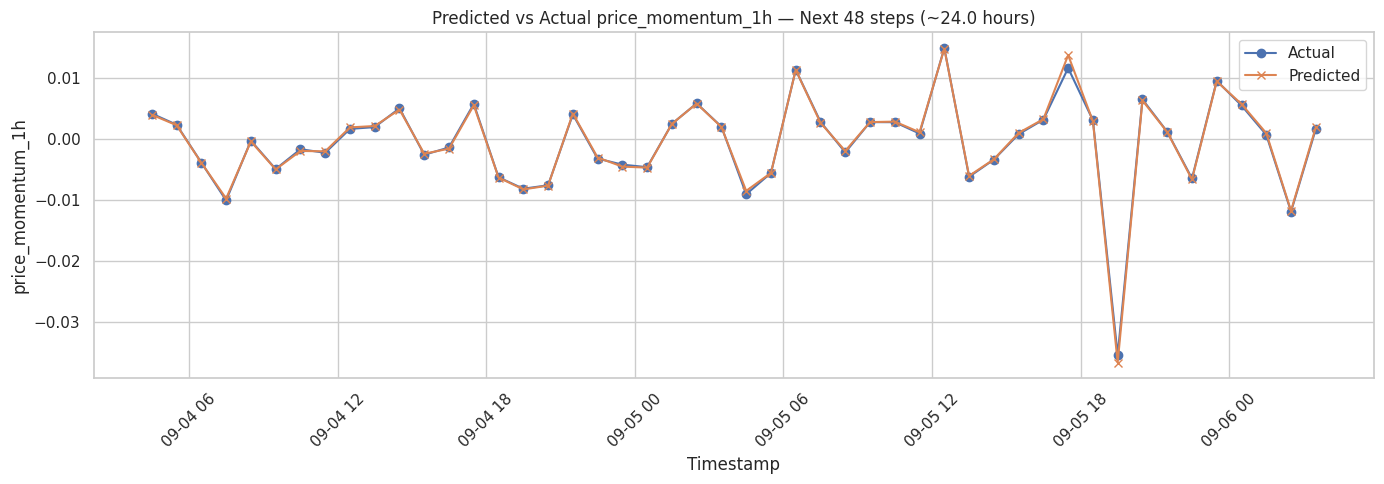

,timestamp,price_momentum_1h,pred_price_momentum_1h
0,2025-09-04 04:30:00,0.004099,0.003914
1,2025-09-04 05:30:00,0.002279,0.002197
2,2025-09-04 06:30:00,-0.003931,-0.003970
3,2025-09-04 07:30:00,-0.010128,-0.009818
4,2025-09-04 08:30:00,-0.000336,-0.000469
5,2025-09-04 09:30:00,-0.004998,-0.005046
6,2025-09-04 10:30:00,-0.001739,-0.002024
7,2025-09-04 11:30:00,-0.002322,-0.002080
8,2025-09-04 12:30:00,0.001600,0.001840
9,2025-09-04 13:30:00,0.001888,0.002069



Notes / Limitations:
- The model is trained to predict 'price_momentum_1h' from available features. Many features (indicators like RSI, MACD, ATR) require future price/volume to update; for real forward forecasting you must:
   1) either use a recursive scheme that updates indicators using predicted prices (complex),
   2) or build models that predict raw future prices directly (and then compute indicators),
   3) or use exogenous calendar-only forecasts (less accurate).
- The 'next 24h' plot above uses the blind test segment's *actual* future data as ground truth (a standard way to visualize short-term forecast capability).
- Increase `time_budget` in automl_settings to allow more search — it usually improves performance (but costs compute/time).
- For production you can persist automl via joblib and load it later:
    automl = load('/content/dataset_splits/flaml_automl_job.joblib')



In [ ]:

# ====== 12) Plot predictions for next 24 hours using test blind partition ======
# Choose 48 rows from test to represent next 24 hours. Use the last 48 rows of test (if there are >=48 rows)
n_steps = 48
if len(test_df) < n_steps:
    n_steps = len(test_df)
    print(f"Test set smaller than 48. Using last {n_steps} rows instead.")

plot_df = test_df.copy().iloc[-n_steps:].reset_index(drop=True)
plot_preds = plot_df['pred_price_momentum_1h'].values
plot_true = plot_df[TARGET].values
plot_times = plot_df['timestamp']

plt.figure(figsize=(14,5))
plt.plot(plot_times, plot_true, label='Actual', marker='o')
plt.plot(plot_times, plot_preds, label='Predicted', marker='x')
plt.xticks(rotation=45)
plt.xlabel("Timestamp")
plt.ylabel(TARGET)
plt.title(f"Predicted vs Actual {TARGET} — Next {n_steps} steps (~{n_steps*0.5} hours)")
plt.legend()
plt.tight_layout()
plt.show()

# Also show a zoomed table of head
display(plot_df[['timestamp', TARGET, 'pred_price_momentum_1h']].head(20))

# ====== 13) Notes: how to produce an iterative forecast for real future timestamps (optional) ======
notes = """
Notes / Limitations:
- The model is trained to predict 'price_momentum_1h' from available features. Many features (indicators like RSI, MACD, ATR) require future price/volume to update; for real forward forecasting you must:
   1) either use a recursive scheme that updates indicators using predicted prices (complex),
   2) or build models that predict raw future prices directly (and then compute indicators),
   3) or use exogenous calendar-only forecasts (less accurate).
- The 'next 24h' plot above uses the blind test segment's *actual* future data as ground truth (a standard way to visualize short-term forecast capability).
- Increase `time_budget` in automl_settings to allow more search — it usually improves performance (but costs compute/time).
- For production you can persist automl via joblib and load it later:
    automl = load('/content/dataset_splits/flaml_automl_job.joblib')
"""
print(notes)


# New data

In [ ]:
import pandas as pd

# Replace 'your_csv_file.csv' with the actual path to your CSV file
csv_file = '/content/drive/MyDrive/Sriya/Datasets/sol_internal_technical_indicators_2year_dataset..csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

In [ ]:
x="timestamp,trade_count,taker_buy_base,bb_width,bb_position,rsi,macd,macd_signal,macd_histogram,volatility,atr,volume_sma,volume_ratio,price_volume,vwap,obv,stoch_d,williams_r,cci,hour,day_of_week,day_of_month,month,quarter,is_weekend,price_momentum_1h,price_momentum_4h,price_momentum_24h,price_momentum_7d,volume_momentum_1h,volume_momentum_24h,high_low_ratio,close_position,upper_shadow,lower_shadow,trend_strength,price_change_1h_future,price_change_4h_future,price_change_24h_future,price_up_1h,price_up_4h,price_up_24h,high_volatility_next_4h"
x=x.split(",")

In [ ]:
len(x)

43

In [ ]:
selected_columns = [
    'timestamp',
    'trade_count',
    'taker_buy_base',
    'bb_width',
    'bb_position',
    'rsi',
    'macd',
    'macd_signal',
    'macd_histogram',
    'volatility',
    'atr',
    'volume_sma',
    'volume_ratio',
    'price_volume',
    'vwap',
    'obv',
    'stoch_d',
    'williams_r',
    'cci',
    'hour',
    'day_of_week',
    'day_of_month',
    'month',
    'quarter',
    'is_weekend',
    'price_momentum_1h',
    'price_momentum_4h',
    'price_momentum_24h',
    'price_momentum_7d',
    'volume_momentum_1h',
    'volume_momentum_24h',
    'high_low_ratio',
    'close_position',
    'upper_shadow',
    'lower_shadow',
    'trend_strength',
    'price_change_1h_future',
    'price_change_4h_future',
    'price_change_24h_future',
    'price_up_1h',
    'price_up_4h',
    'price_up_24h',
    'high_volatility_next_4h'
]

df_selected = df[selected_columns].copy()

# Display the first few rows of the new DataFrame
display(df_selected.head())

,timestamp,trade_count,taker_buy_base,bb_width,bb_position,rsi,macd,macd_signal,macd_histogram,volatility,...,upper_shadow,lower_shadow,trend_strength,price_change_1h_future,price_change_4h_future,price_change_24h_future,price_up_1h,price_up_4h,price_up_24h,high_volatility_next_4h
0,2023-08-18 03:30:00,249826,3552040.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.117502,0.276910,0.0,0.000000,0.000000,0.000000,0,0,0,0
1,2023-08-18 04:30:00,119739,1522626.0,0.0,0.0,0.0,-0.007538,-0.004188,-0.003350,0.0,...,0.357895,0.054386,0.0,0.014081,0.005790,-0.002525,1,1,0,0
2,2023-08-18 05:30:00,76215,1208262.0,0.0,0.0,0.0,-0.000147,-0.002532,0.002385,0.0,...,0.123482,0.265182,0.0,-0.008695,-0.000093,0.010077,0,0,1,0
3,2023-08-18 06:30:00,40368,526544.0,0.0,0.0,0.0,-0.003678,-0.002920,-0.000758,0.0,...,0.038095,0.365079,0.0,-0.016395,0.014624,-0.007424,0,1,0,0
4,2023-08-18 07:30:00,50178,749504.0,0.0,0.0,0.0,-0.019725,-0.007919,-0.011806,0.0,...,0.203422,0.115970,0.0,0.005790,0.009151,0.002898,1,1,1,0


In [ ]:
columns=['price_change_1h_future','price_change_4h_future','price_change_24h_future','price_up_1h','price_up_4h','price_up_24h','high_volatility_next_4h',]

In [ ]:
len(columns)

7

In [ ]:
df.drop(columns=['price_change_1h_future','price_change_4h_future','price_change_24h_future','price_up_1h','price_up_4h','price_up_24h','high_volatility_next_4h'],inplace=True)